In [2]:
import pandas as pd
import numpy as np

import math

from sklearn.model_selection import train_test_split

import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
from shapely.geometry import box
from shapely.geometry import Point
from sklearn.metrics import accuracy_score, confusion_matrix

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import numpy as np

In [3]:
file_path = 'annotation_features_training_compostite_2023_Features_Divide10000.csv'
df = pd.read_csv(file_path)

In [4]:
df

,Class,Canopy,Methods,Percent,X,Y,2023_01_Data_band_1,2023_01_Data_band_2,2023_01_Data_band_3,2023_01_Data_band_4,...,Rivers_Distance_band_1_band_1,Population_KD_band_1_band_1,Livestock_2015_KD_band_1_band_1,Building_KD_band_1_band_1,Aspect_band_1_band_1,CanopyHeight_ROI_band_1,M50,M100,M500,M1000
0,9,1.0,2.0,15.0,37.133880,0.372123,0.0941,0.1510,0.2302,0.2917,...,262.497833,71.964180,315.335083,0.012451,107.686027,0,4018229.0,1005459.0,40172.0,10096.0
1,9,2.0,2.0,20.0,37.133884,0.372211,0.0834,0.1370,0.2046,0.2789,...,264.690887,72.103287,315.349518,0.012505,182.403366,0,4018229.0,1005459.0,40172.0,10096.0
2,9,1.0,2.0,10.0,37.133966,0.372214,0.0970,0.1582,0.2410,0.2868,...,274.443603,72.356094,315.366089,0.012563,188.897965,0,4018229.0,1005459.0,40172.0,10096.0
3,2,NaN,2.0,NaN,37.133961,0.372302,0.1005,0.1643,0.2498,0.2815,...,276.746094,72.494011,315.380890,0.012617,273.546020,0,4020928.0,1005459.0,40172.0,10096.0
4,9,1.0,2.0,10.0,37.133792,0.372221,0.0815,0.1408,0.2183,0.2702,...,254.956116,71.849350,315.332947,0.012448,193.586395,0,4018228.0,1005458.0,40172.0,10096.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,5,NaN,NaN,NaN,37.390507,0.303173,0.0810,0.1162,0.1743,0.2126,...,1039.734985,7.935099,286.022156,0.098710,34.656223,0,NaN,NaN,NaN,NaN
1993,2,NaN,NaN,NaN,37.387829,0.292655,0.0873,0.1231,0.1847,0.2169,...,852.927185,7.805482,293.128601,0.247697,198.434952,0,NaN,NaN,NaN,NaN
1994,5,NaN,NaN,NaN,37.315773,0.376208,0.0470,0.0704,0.0787,0.1426,...,561.730041,7.093152,304.098633,0.072463,70.123627,0,NaN,NaN,NaN,NaN
1995,2,NaN,NaN,NaN,37.299536,0.454051,0.0812,0.1240,0.1996,0.2447,...,224.756516,0.000000,297.764740,0.019057,90.000000,0,NaN,NaN,NaN,NaN


In [5]:
all_features_columns = [
    "2023_01_Data_band_1","2023_01_Data_band_2","2023_01_Data_band_3","2023_01_Data_band_4","2023_01_Data_band_5","2023_01_Data_band_6","2023_01_Data_band_7","2023_01_Data_band_8","2023_01_Data_band_9","2023_01_Data_band_10",
    "2023_02_Data_band_1","2023_02_Data_band_2","2023_02_Data_band_3","2023_02_Data_band_4","2023_02_Data_band_5","2023_02_Data_band_6","2023_02_Data_band_7","2023_02_Data_band_8","2023_02_Data_band_9","2023_02_Data_band_10",
    "2023_03_Data_band_1","2023_03_Data_band_2","2023_03_Data_band_3","2023_03_Data_band_4","2023_03_Data_band_5","2023_03_Data_band_6","2023_03_Data_band_7","2023_03_Data_band_8","2023_03_Data_band_9","2023_03_Data_band_10",
    "2023_04_Data_band_1","2023_04_Data_band_2","2023_04_Data_band_3","2023_04_Data_band_4","2023_04_Data_band_5","2023_04_Data_band_6","2023_04_Data_band_7","2023_04_Data_band_8","2023_04_Data_band_9","2023_04_Data_band_10",
    "2023_05_Data_band_1","2023_05_Data_band_2","2023_05_Data_band_3","2023_05_Data_band_4","2023_05_Data_band_5","2023_05_Data_band_6","2023_05_Data_band_7","2023_05_Data_band_8","2023_05_Data_band_9","2023_05_Data_band_10",
    "2023_06_Data_band_1","2023_06_Data_band_2","2023_06_Data_band_3","2023_06_Data_band_4","2023_06_Data_band_5","2023_06_Data_band_6","2023_06_Data_band_7","2023_06_Data_band_8","2023_06_Data_band_9","2023_06_Data_band_10",
    "2023_07_Data_band_1","2023_07_Data_band_2","2023_07_Data_band_3","2023_07_Data_band_4","2023_07_Data_band_5","2023_07_Data_band_6","2023_07_Data_band_7","2023_07_Data_band_8","2023_07_Data_band_9","2023_07_Data_band_10",
    "2023_08_Data_band_1","2023_08_Data_band_2","2023_08_Data_band_3","2023_08_Data_band_4","2023_08_Data_band_5","2023_08_Data_band_6","2023_08_Data_band_7","2023_08_Data_band_8","2023_08_Data_band_9","2023_08_Data_band_10",
    "2023_09_Data_band_1","2023_09_Data_band_2","2023_09_Data_band_3","2023_09_Data_band_4","2023_09_Data_band_5","2023_09_Data_band_6","2023_09_Data_band_7","2023_09_Data_band_8","2023_09_Data_band_9","2023_09_Data_band_10",
    "2023_10_Data_band_1","2023_10_Data_band_2","2023_10_Data_band_3","2023_10_Data_band_4","2023_10_Data_band_5","2023_10_Data_band_6","2023_10_Data_band_7","2023_10_Data_band_8","2023_10_Data_band_9","2023_10_Data_band_10",
    "2023_11_Data_band_1","2023_11_Data_band_2","2023_11_Data_band_3","2023_11_Data_band_4","2023_11_Data_band_5","2023_11_Data_band_6","2023_11_Data_band_7","2023_11_Data_band_8","2023_11_Data_band_9","2023_11_Data_band_10",
    "2023_12_Data_band_1","2023_12_Data_band_2","2023_12_Data_band_3","2023_12_Data_band_4","2023_12_Data_band_5","2023_12_Data_band_6","2023_12_Data_band_7","2023_12_Data_band_8","2023_12_Data_band_9","2023_12_Data_band_10",
    "2023_01_ndvi_band_1","2023_02_ndvi_band_1","2023_03_ndvi_band_1","2023_04_ndvi_band_1","2023_05_ndvi_band_1","2023_06_ndvi_band_1","2023_07_ndvi_band_1","2023_08_ndvi_band_1","2023_09_ndvi_band_1","2023_10_ndvi_band_1","2023_11_ndvi_band_1","2023_12_ndvi_band_1",
    "2023_01_ndwi_band_1","2023_02_ndwi_band_1","2023_03_ndwi_band_1","2023_04_ndwi_band_1","2023_05_ndwi_band_1","2023_06_ndwi_band_1","2023_07_ndwi_band_1","2023_08_ndwi_band_1","2023_09_ndwi_band_1","2023_10_ndwi_band_1","2023_11_ndwi_band_1","2023_12_ndwi_band_1",
    "2023_01_gndvi_band_1","2023_02_gndvi_band_1","2023_03_gndvi_band_1","2023_04_gndvi_band_1","2023_05_gndvi_band_1","2023_06_gndvi_band_1","2023_07_gndvi_band_1","2023_08_gndvi_band_1","2023_09_gndvi_band_1","2023_10_gndvi_band_1","2023_11_gndvi_band_1","2023_12_gndvi_band_1",
    "2023_01_msavi_band_1","2023_02_msavi_band_1","2023_03_msavi_band_1","2023_04_msavi_band_1","2023_05_msavi_band_1","2023_06_msavi_band_1","2023_07_msavi_band_1","2023_08_msavi_band_1","2023_09_msavi_band_1","2023_10_msavi_band_1","2023_11_msavi_band_1","2023_12_msavi_band_1",
    "2023_01_precipitation_band_1","2023_02_precipitation_band_1","2023_03_precipitation_band_1","2023_04_precipitation_band_1","2023_05_precipitation_band_1","2023_06_precipitation_band_1","2023_07_precipitation_band_1","2023_08_precipitation_band_1","2023_09_precipitation_band_1","2023_10_precipitation_band_1","2023_11_precipitation_band_1","2023_12_precipitation_band_1",
    "2023_01_LST_Night_band_1","2023_02_LST_Night_band_1","2023_03_LST_Night_band_1","2023_04_LST_Night_band_1","2023_05_LST_Night_band_1","2023_06_LST_Night_band_1","2023_07_LST_Night_band_1","2023_08_LST_Night_band_1","2023_09_LST_Night_band_1","2023_10_LST_Night_band_1","2023_11_LST_Night_band_1","2023_12_LST_Night_band_1",
    "2023_01_LST_Day_band_1","2023_02_LST_Day_band_1","2023_03_LST_Day_band_1","2023_04_LST_Day_band_1","2023_05_LST_Day_band_1","2023_06_LST_Day_band_1","2023_07_LST_Day_band_1","2023_08_LST_Day_band_1","2023_09_LST_Day_band_1","2023_10_LST_Day_band_1","2023_11_LST_Day_band_1","2023_12_LST_Day_band_1",
    "2023_01_ET_band_1","2023_02_ET_band_1","2023_03_ET_band_1","2023_04_ET_band_1","2023_05_ET_band_1","2023_06_ET_band_1","2023_07_ET_band_1","2023_08_ET_band_1","2023_09_ET_band_1","2023_10_ET_band_1","2023_11_ET_band_1","2023_12_ET_band_1",
    "Slope_band_1_band_1","PublicPolygons_Distance_band_1_band_1","SRTM_ELEV_band_1_band_1","WetLands_Distance_band_1_band_1","WaterBodies_Distance_band_1_band_1","TWI_band_1_band_1",
    "TPI_band_1_band_1","Rivers_Distance_band_1_band_1","Population_KD_band_1_band_1","Livestock_2015_KD_band_1_band_1","Building_KD_band_1_band_1","Aspect_band_1_band_1","CanopyHeight_ROI_band_1"
]

In [6]:
len(all_features_columns)

229

In [7]:
df = df.dropna(subset=all_features_columns)

In [8]:
df_GSV = df.loc[df['Class'].isin([1,2,5,7,9])]
df_GSV = df_GSV.loc[df_GSV['Methods'].isin([1,2,3])]
df_GSV = df_GSV.loc[
    (df_GSV['Canopy'] == 1) | (df_GSV['Canopy'].isna())
]

In [9]:
df_GSV

,Class,Canopy,Methods,Percent,X,Y,2023_01_Data_band_1,2023_01_Data_band_2,2023_01_Data_band_3,2023_01_Data_band_4,...,Rivers_Distance_band_1_band_1,Population_KD_band_1_band_1,Livestock_2015_KD_band_1_band_1,Building_KD_band_1_band_1,Aspect_band_1_band_1,CanopyHeight_ROI_band_1,M50,M100,M500,M1000
0,9,1.0,2.0,15.0,37.133880,0.372123,0.0941,0.1510,0.2302,0.2917,...,262.497833,71.964180,315.335083,0.012451,107.686027,0,4018229.0,1005459.0,40172.0,10096.0
2,9,1.0,2.0,10.0,37.133966,0.372214,0.0970,0.1582,0.2410,0.2868,...,274.443603,72.356094,315.366089,0.012563,188.897965,0,4018229.0,1005459.0,40172.0,10096.0
3,2,NaN,2.0,NaN,37.133961,0.372302,0.1005,0.1643,0.2498,0.2815,...,276.746094,72.494011,315.380890,0.012617,273.546020,0,4020928.0,1005459.0,40172.0,10096.0
4,9,1.0,2.0,10.0,37.133792,0.372221,0.0815,0.1408,0.2183,0.2702,...,254.956116,71.849350,315.332947,0.012448,193.586395,0,4018228.0,1005458.0,40172.0,10096.0
6,9,1.0,2.0,15.0,37.133539,0.372317,0.0774,0.1306,0.2030,0.2561,...,228.516342,71.217728,315.296326,0.012327,82.386841,0,4020927.0,1005458.0,40172.0,10096.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,9,NaN,3.0,NaN,37.025085,0.130277,0.1042,0.1354,0.1746,0.2010,...,1057.597290,101.135818,345.865509,0.000000,46.918083,0,2563225.0,640837.0,25568.0,6439.0
1969,9,NaN,3.0,NaN,37.025161,0.130080,0.0858,0.1184,0.1544,0.1973,...,1050.744019,100.877747,346.134308,0.000000,133.785217,0,2563225.0,640837.0,25568.0,6439.0
1970,9,NaN,3.0,NaN,37.043117,0.067993,0.1088,0.1372,0.1868,0.2062,...,2868.680176,105.718224,456.145233,2.743871,53.244263,0,2190803.0,547707.0,22062.0,5496.0
1971,9,NaN,3.0,NaN,37.018419,0.157371,0.0871,0.1204,0.1664,0.1882,...,1445.156494,131.895966,323.681610,0.000000,-1.000000,0,2727849.0,682680.0,27456.0,6843.0


# Generating time statistical and DTW features

In [10]:
months = [
    "2023_01", "2023_02", "2023_03", "2023_04", "2023_05", "2023_06", 
    "2023_07", "2023_08", "2023_09", "2023_10", "2023_11", "2023_12"
]

# Calculate statistics for each band across all months
bands = [f"band_{i}" for i in range(1, 11)]

for band in bands:
    band_cols = [f"{month}_Data_{band}" for month in months]
    df_GSV[f"{band}_mean"] = df_GSV[band_cols].mean(axis=1)
    df_GSV[f"{band}_std"] = df_GSV[band_cols].std(axis=1)
    df_GSV[f"{band}_min"] = df_GSV[band_cols].min(axis=1)
    df_GSV[f"{band}_max"] = df_GSV[band_cols].max(axis=1)
    df_GSV[f"{band}_range"] = df_GSV[f"{band}_max"] - df_GSV[f"{band}_min"]

# Calculate annual statistics for additional metrics
metrics = ["ndvi", "ndwi", "gndvi", "msavi", "precipitation", "LST_Night", "LST_Day", "ET"]

for metric in metrics:
    annual_cols = [f"{month}_{metric}_band_1" for month in months]
    df_GSV[f"{metric}_mean"] = df_GSV[annual_cols].mean(axis=1)
    df_GSV[f"{metric}_std"] = df_GSV[annual_cols].std(axis=1)
    df_GSV[f"{metric}_min"] = df_GSV[annual_cols].min(axis=1)
    df_GSV[f"{metric}_max"] = df_GSV[annual_cols].max(axis=1)
    df_GSV[f"{metric}_range"] = df_GSV[f"{metric}_max"] - df_GSV[f"{metric}_min"]


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from dtaidistance import dtw

time_series_groups = {
    "band_1": [f"2023_{str(month).zfill(2)}_Data_band_1" for month in range(1, 13)],
    "band_2": [f"2023_{str(month).zfill(2)}_Data_band_2" for month in range(1, 13)],
    "band_3": [f"2023_{str(month).zfill(2)}_Data_band_3" for month in range(1, 13)],
    "band_4": [f"2023_{str(month).zfill(2)}_Data_band_4" for month in range(1, 13)],
    "band_5": [f"2023_{str(month).zfill(2)}_Data_band_5" for month in range(1, 13)],
    "band_6": [f"2023_{str(month).zfill(2)}_Data_band_6" for month in range(1, 13)],
    "band_7": [f"2023_{str(month).zfill(2)}_Data_band_7" for month in range(1, 13)],
    "band_8": [f"2023_{str(month).zfill(2)}_Data_band_8" for month in range(1, 13)],
    "band_9": [f"2023_{str(month).zfill(2)}_Data_band_9" for month in range(1, 13)],
    "band_10": [f"2023_{str(month).zfill(2)}_Data_band_10" for month in range(1, 13)],

    "ndvi": [f"2023_{str(month).zfill(2)}_ndvi_band_1" for month in range(1, 13)],
    "ndwi": [f"2023_{str(month).zfill(2)}_ndwi_band_1" for month in range(1, 13)],
    "gndvi": [f"2023_{str(month).zfill(2)}_gndvi_band_1" for month in range(1, 13)],
    "msavi": [f"2023_{str(month).zfill(2)}_msavi_band_1" for month in range(1, 13)],
    "precipitation": [f"2023_{str(month).zfill(2)}_precipitation_band_1" for month in range(1, 13)],
    "LST_Night": [f"2023_{str(month).zfill(2)}_LST_Night_band_1" for month in range(1, 13)],
    "LST_Day": [f"2023_{str(month).zfill(2)}_LST_Day_band_1" for month in range(1, 13)],
    "ET": [f"2023_{str(month).zfill(2)}_ET_band_1" for month in range(1, 13)],
    
}

from sklearn.model_selection import GroupShuffleSplit

groups = df_GSV['M100']
labels = df_GSV['Class']

gss = GroupShuffleSplit(test_size=0.2, n_splits=1, random_state=6)

train_idx, test_idx = next(gss.split(df_GSV, labels, groups))

train_df = df_GSV.iloc[train_idx]
test_df = df_GSV.iloc[test_idx]

global_mean_sequences = {}

for key, columns in time_series_groups.items():
    global_mean_sequences[key] = train_df[columns].mean(axis=0).values

def compute_dtw_feature_group(row, group_key, global_mean_sequences):

    row_float = row.values.astype(float)
    global_mean_sequence_float = global_mean_sequences[group_key].astype(float)
    return dtw.distance_fast(row_float, global_mean_sequence_float)


dtw_features = pd.DataFrame(index=train_df.index)
for group_key, columns in time_series_groups.items():

    dtw_features[f"DTW_{group_key}_Distance"] = train_df[columns].apply(
        lambda row: compute_dtw_feature_group(row, group_key, global_mean_sequences), axis=1
    )

for col in dtw_features.columns:
    df_GSV[col] = 0  
    df_GSV.loc[train_df.index, col] = dtw_features[col]

In [12]:
df_GSV

,Class,Canopy,Methods,Percent,X,Y,2023_01_Data_band_1,2023_01_Data_band_2,2023_01_Data_band_3,2023_01_Data_band_4,...,DTW_band_9_Distance,DTW_band_10_Distance,DTW_ndvi_Distance,DTW_ndwi_Distance,DTW_gndvi_Distance,DTW_msavi_Distance,DTW_precipitation_Distance,DTW_LST_Night_Distance,DTW_LST_Day_Distance,DTW_ET_Distance
0,9,1.0,2.0,15.0,37.133880,0.372123,0.0941,0.1510,0.2302,0.2917,...,0.433493,0.473454,0.397081,0.181808,0.181808,0.201455,10.936153,90.710392,201.526595,70.564868
2,9,1.0,2.0,10.0,37.133966,0.372214,0.0970,0.1582,0.2410,0.2868,...,0.420455,0.465783,0.427551,0.178705,0.178705,0.153214,10.951005,90.572090,201.597352,70.232151
3,2,NaN,2.0,NaN,37.133961,0.372302,0.1005,0.1643,0.2498,0.2815,...,0.390399,0.436738,0.406993,0.203645,0.203645,0.164987,10.946851,90.554752,201.576028,70.362227
4,9,1.0,2.0,10.0,37.133792,0.372221,0.0815,0.1408,0.2183,0.2702,...,0.345620,0.378784,0.360751,0.167535,0.167535,0.192146,10.912961,90.837921,201.129747,70.634340
6,9,1.0,2.0,15.0,37.133539,0.372317,0.0774,0.1306,0.2030,0.2561,...,0.319317,0.306354,0.442408,0.196813,0.196813,0.229337,10.851727,91.573275,200.381503,70.356419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,9,NaN,3.0,NaN,37.025085,0.130277,0.1042,0.1354,0.1746,0.2010,...,0.133364,0.133506,0.312413,0.285475,0.285475,0.197357,7.957413,126.871854,466.782469,53.269982
1969,9,NaN,3.0,NaN,37.025161,0.130080,0.0858,0.1184,0.1544,0.1973,...,0.147936,0.119729,0.241680,0.225965,0.225965,0.141829,7.965616,127.598028,465.950245,54.587518
1970,9,NaN,3.0,NaN,37.043117,0.067993,0.1088,0.1372,0.1868,0.2062,...,0.062124,0.110712,0.357039,0.327788,0.327788,0.213240,9.454697,177.095032,407.050580,50.904974
1971,9,NaN,3.0,NaN,37.018419,0.157371,0.0871,0.1204,0.1664,0.1882,...,0.096884,0.136597,0.284890,0.212479,0.212479,0.172379,6.497409,101.580115,371.631792,38.155032


In [13]:
all_features_columns = [
    "2023_01_Data_band_1","2023_01_Data_band_2","2023_01_Data_band_3","2023_01_Data_band_4","2023_01_Data_band_5","2023_01_Data_band_6","2023_01_Data_band_7","2023_01_Data_band_8","2023_01_Data_band_9","2023_01_Data_band_10",
    "2023_02_Data_band_1","2023_02_Data_band_2","2023_02_Data_band_3","2023_02_Data_band_4","2023_02_Data_band_5","2023_02_Data_band_6","2023_02_Data_band_7","2023_02_Data_band_8","2023_02_Data_band_9","2023_02_Data_band_10",
    "2023_03_Data_band_1","2023_03_Data_band_2","2023_03_Data_band_3","2023_03_Data_band_4","2023_03_Data_band_5","2023_03_Data_band_6","2023_03_Data_band_7","2023_03_Data_band_8","2023_03_Data_band_9","2023_03_Data_band_10",
    "2023_04_Data_band_1","2023_04_Data_band_2","2023_04_Data_band_3","2023_04_Data_band_4","2023_04_Data_band_5","2023_04_Data_band_6","2023_04_Data_band_7","2023_04_Data_band_8","2023_04_Data_band_9","2023_04_Data_band_10",
    "2023_05_Data_band_1","2023_05_Data_band_2","2023_05_Data_band_3","2023_05_Data_band_4","2023_05_Data_band_5","2023_05_Data_band_6","2023_05_Data_band_7","2023_05_Data_band_8","2023_05_Data_band_9","2023_05_Data_band_10",
    "2023_06_Data_band_1","2023_06_Data_band_2","2023_06_Data_band_3","2023_06_Data_band_4","2023_06_Data_band_5","2023_06_Data_band_6","2023_06_Data_band_7","2023_06_Data_band_8","2023_06_Data_band_9","2023_06_Data_band_10",
    "2023_07_Data_band_1","2023_07_Data_band_2","2023_07_Data_band_3","2023_07_Data_band_4","2023_07_Data_band_5","2023_07_Data_band_6","2023_07_Data_band_7","2023_07_Data_band_8","2023_07_Data_band_9","2023_07_Data_band_10",
    "2023_08_Data_band_1","2023_08_Data_band_2","2023_08_Data_band_3","2023_08_Data_band_4","2023_08_Data_band_5","2023_08_Data_band_6","2023_08_Data_band_7","2023_08_Data_band_8","2023_08_Data_band_9","2023_08_Data_band_10",
    "2023_09_Data_band_1","2023_09_Data_band_2","2023_09_Data_band_3","2023_09_Data_band_4","2023_09_Data_band_5","2023_09_Data_band_6","2023_09_Data_band_7","2023_09_Data_band_8","2023_09_Data_band_9","2023_09_Data_band_10",
    "2023_10_Data_band_1","2023_10_Data_band_2","2023_10_Data_band_3","2023_10_Data_band_4","2023_10_Data_band_5","2023_10_Data_band_6","2023_10_Data_band_7","2023_10_Data_band_8","2023_10_Data_band_9","2023_10_Data_band_10",
    "2023_11_Data_band_1","2023_11_Data_band_2","2023_11_Data_band_3","2023_11_Data_band_4","2023_11_Data_band_5","2023_11_Data_band_6","2023_11_Data_band_7","2023_11_Data_band_8","2023_11_Data_band_9","2023_11_Data_band_10",
    "2023_12_Data_band_1","2023_12_Data_band_2","2023_12_Data_band_3","2023_12_Data_band_4","2023_12_Data_band_5","2023_12_Data_band_6","2023_12_Data_band_7","2023_12_Data_band_8","2023_12_Data_band_9","2023_12_Data_band_10",
    "2023_01_ndvi_band_1","2023_02_ndvi_band_1","2023_03_ndvi_band_1","2023_04_ndvi_band_1","2023_05_ndvi_band_1","2023_06_ndvi_band_1","2023_07_ndvi_band_1","2023_08_ndvi_band_1","2023_09_ndvi_band_1","2023_10_ndvi_band_1","2023_11_ndvi_band_1","2023_12_ndvi_band_1",
    "2023_01_ndwi_band_1","2023_02_ndwi_band_1","2023_03_ndwi_band_1","2023_04_ndwi_band_1","2023_05_ndwi_band_1","2023_06_ndwi_band_1","2023_07_ndwi_band_1","2023_08_ndwi_band_1","2023_09_ndwi_band_1","2023_10_ndwi_band_1","2023_11_ndwi_band_1","2023_12_ndwi_band_1",
    "2023_01_gndvi_band_1","2023_02_gndvi_band_1","2023_03_gndvi_band_1","2023_04_gndvi_band_1","2023_05_gndvi_band_1","2023_06_gndvi_band_1","2023_07_gndvi_band_1","2023_08_gndvi_band_1","2023_09_gndvi_band_1","2023_10_gndvi_band_1","2023_11_gndvi_band_1","2023_12_gndvi_band_1",
    "2023_01_msavi_band_1","2023_02_msavi_band_1","2023_03_msavi_band_1","2023_04_msavi_band_1","2023_05_msavi_band_1","2023_06_msavi_band_1","2023_07_msavi_band_1","2023_08_msavi_band_1","2023_09_msavi_band_1","2023_10_msavi_band_1","2023_11_msavi_band_1","2023_12_msavi_band_1",
    "2023_01_precipitation_band_1","2023_02_precipitation_band_1","2023_03_precipitation_band_1","2023_04_precipitation_band_1","2023_05_precipitation_band_1","2023_06_precipitation_band_1","2023_07_precipitation_band_1","2023_08_precipitation_band_1","2023_09_precipitation_band_1","2023_10_precipitation_band_1","2023_11_precipitation_band_1","2023_12_precipitation_band_1",
    "2023_01_LST_Night_band_1","2023_02_LST_Night_band_1","2023_03_LST_Night_band_1","2023_04_LST_Night_band_1","2023_05_LST_Night_band_1","2023_06_LST_Night_band_1","2023_07_LST_Night_band_1","2023_08_LST_Night_band_1","2023_09_LST_Night_band_1","2023_10_LST_Night_band_1","2023_11_LST_Night_band_1","2023_12_LST_Night_band_1",
    "2023_01_LST_Day_band_1","2023_02_LST_Day_band_1","2023_03_LST_Day_band_1","2023_04_LST_Day_band_1","2023_05_LST_Day_band_1","2023_06_LST_Day_band_1","2023_07_LST_Day_band_1","2023_08_LST_Day_band_1","2023_09_LST_Day_band_1","2023_10_LST_Day_band_1","2023_11_LST_Day_band_1","2023_12_LST_Day_band_1",
    "2023_01_ET_band_1","2023_02_ET_band_1","2023_03_ET_band_1","2023_04_ET_band_1","2023_05_ET_band_1","2023_06_ET_band_1","2023_07_ET_band_1","2023_08_ET_band_1","2023_09_ET_band_1","2023_10_ET_band_1","2023_11_ET_band_1","2023_12_ET_band_1",
    "Slope_band_1_band_1","PublicPolygons_Distance_band_1_band_1","SRTM_ELEV_band_1_band_1","WetLands_Distance_band_1_band_1","WaterBodies_Distance_band_1_band_1","TWI_band_1_band_1",
    "TPI_band_1_band_1","Rivers_Distance_band_1_band_1","Population_KD_band_1_band_1","Livestock_2015_KD_band_1_band_1","Building_KD_band_1_band_1","Aspect_band_1_band_1","CanopyHeight_ROI_band_1",
    "band_1_mean","band_1_std","band_1_min","band_1_max","band_1_range",
    "band_2_mean","band_2_std","band_2_min","band_2_max","band_2_range",
    "band_3_mean","band_3_std","band_3_min","band_3_max","band_3_range",
    "band_4_mean","band_4_std","band_4_min","band_4_max","band_4_range",
    "band_5_mean","band_5_std","band_5_min","band_5_max","band_5_range",
    "band_6_mean","band_6_std","band_6_min","band_6_max","band_6_range",
    "band_7_mean","band_7_std","band_7_min","band_7_max","band_7_range",
    "band_8_mean","band_8_std","band_8_min","band_8_max","band_8_range",
    "band_9_mean","band_9_std","band_9_min","band_9_max","band_9_range",
    "band_10_mean","band_10_std","band_10_min","band_10_max","band_10_range",
    "ET_mean","ET_std","ET_min","ET_max","ET_range",
    "LST_Day_mean","LST_Day_std","LST_Day_min","LST_Day_max","LST_Day_range",
    "LST_Night_mean","LST_Night_std","LST_Night_min","LST_Night_max","LST_Night_range",
    "precipitation_mean","precipitation_std","precipitation_min","precipitation_max","precipitation_range",
    "ndvi_mean","ndvi_std","ndvi_min","ndvi_max","ndvi_range",
    "ndwi_mean","ndwi_std","ndwi_min","ndwi_max","ndwi_range",
    "gndvi_mean","gndvi_std","gndvi_min","gndvi_max","gndvi_range",
    "msavi_mean","msavi_std","msavi_min","msavi_max","msavi_range",
    "DTW_band_1_Distance","DTW_band_2_Distance","DTW_band_3_Distance","DTW_band_4_Distance","DTW_band_5_Distance","DTW_band_6_Distance","DTW_band_7_Distance","DTW_band_8_Distance","DTW_band_9_Distance","DTW_band_10_Distance",
    "DTW_ndvi_Distance","DTW_ndwi_Distance","DTW_gndvi_Distance","DTW_msavi_Distance","DTW_precipitation_Distance","DTW_LST_Night_Distance","DTW_LST_Day_Distance","DTW_ET_Distance"
]

In [14]:
len(all_features_columns)

337

# RFECV

In [15]:
X = df_GSV[all_features_columns].values
y = df_GSV['Class'].values

In [16]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rfecv = RFECV(
    estimator=rf_model,
    step=1,  
    cv=cv,
    scoring='accuracy',  
    min_features_to_select=10,  
    n_jobs=-1,  
)

In [ ]:
rfecv.fit(X, y)

最优特征数目: 236
保留的特征索引: [  0   1   2   3   8   9  10  11  12  16  18  19  20  21  22  24  25  26
  27  28  29  38  40  41  42  43  45  46  48  50  51  52  54  55  56  57
  58  60  61  63  68  70  71  72  74  76  77  78  80  81  82  84  86  88
  90  91  94  96  97  98 103 106 107 109 110 111 112 113 116 118 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 138 139 140
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 196 197
 198 200 201 202 203 204 208 209 210 211 212 213 215 217 218 219 220 223
 224 225 229 230 232 233 234 235 236 237 238 239 240 241 242 243 244 246
 248 259 262 264 265 269 271 272 273 274 275 276 277 278 279 280 282 283
 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302
 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 329 332
 333 334]
保留的特征: ['2023_01_Dat

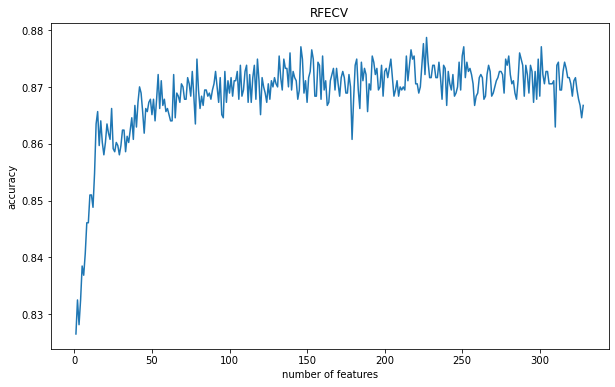

In [17]:
print(f"最优特征数目: {rfecv.n_features_}")
print(f"保留的特征索引: {np.where(rfecv.support_)[0]}")
selected_features = [all_features_columns[i] for i in range(len(all_features_columns)) if rfecv.support_[i]]
print(f"保留的特征: {selected_features}")

# 绘制评分随特征数变化的曲线
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.xlabel("number of features")
plt.ylabel("accuracy")
plt.title("RFECV")
plt.savefig("RFECV.svg", dpi=1200, bbox_inches='tight')
plt.show()
plt.show()

In [18]:
selected_features_columns = ['2023_01_Data_band_1', '2023_01_Data_band_2', '2023_01_Data_band_3', '2023_01_Data_band_4', '2023_01_Data_band_9', '2023_01_Data_band_10', '2023_02_Data_band_1', '2023_02_Data_band_2', '2023_02_Data_band_3', '2023_02_Data_band_7', '2023_02_Data_band_9', '2023_02_Data_band_10', '2023_03_Data_band_1', '2023_03_Data_band_2', '2023_03_Data_band_3', '2023_03_Data_band_5', '2023_03_Data_band_6', '2023_03_Data_band_7', '2023_03_Data_band_8', '2023_03_Data_band_9', '2023_03_Data_band_10', '2023_04_Data_band_9', '2023_05_Data_band_1', '2023_05_Data_band_2', '2023_05_Data_band_3', '2023_05_Data_band_4', '2023_05_Data_band_6', '2023_05_Data_band_7', '2023_05_Data_band_9', '2023_06_Data_band_1', '2023_06_Data_band_2', '2023_06_Data_band_3', '2023_06_Data_band_5', '2023_06_Data_band_6', '2023_06_Data_band_7', '2023_06_Data_band_8', '2023_06_Data_band_9', '2023_07_Data_band_1', '2023_07_Data_band_2', '2023_07_Data_band_4', '2023_07_Data_band_9', '2023_08_Data_band_1', '2023_08_Data_band_2', '2023_08_Data_band_3', '2023_08_Data_band_5', '2023_08_Data_band_7', '2023_08_Data_band_8', '2023_08_Data_band_9', '2023_09_Data_band_1', '2023_09_Data_band_2', '2023_09_Data_band_3', '2023_09_Data_band_5', '2023_09_Data_band_7', '2023_09_Data_band_9', '2023_10_Data_band_1', '2023_10_Data_band_2', '2023_10_Data_band_5', '2023_10_Data_band_7', '2023_10_Data_band_8', '2023_10_Data_band_9', '2023_11_Data_band_4', '2023_11_Data_band_7', '2023_11_Data_band_8', '2023_11_Data_band_10', '2023_12_Data_band_1', '2023_12_Data_band_2', '2023_12_Data_band_3', '2023_12_Data_band_4', '2023_12_Data_band_7', '2023_12_Data_band_9', '2023_01_ndvi_band_1', '2023_02_ndvi_band_1', '2023_03_ndvi_band_1', '2023_04_ndvi_band_1', '2023_05_ndvi_band_1', '2023_06_ndvi_band_1', '2023_07_ndvi_band_1', '2023_08_ndvi_band_1', '2023_09_ndvi_band_1', '2023_10_ndvi_band_1', '2023_11_ndvi_band_1', '2023_12_ndvi_band_1', '2023_01_ndwi_band_1', '2023_02_ndwi_band_1', '2023_03_ndwi_band_1', '2023_04_ndwi_band_1', '2023_05_ndwi_band_1', '2023_07_ndwi_band_1', '2023_08_ndwi_band_1', '2023_09_ndwi_band_1', '2023_11_ndwi_band_1', '2023_12_ndwi_band_1', '2023_01_gndvi_band_1', '2023_02_gndvi_band_1', '2023_03_gndvi_band_1', '2023_04_gndvi_band_1', '2023_05_gndvi_band_1', '2023_06_gndvi_band_1', '2023_07_gndvi_band_1', '2023_08_gndvi_band_1', '2023_09_gndvi_band_1', '2023_10_gndvi_band_1', '2023_11_gndvi_band_1', '2023_12_gndvi_band_1', '2023_01_msavi_band_1', '2023_02_msavi_band_1', '2023_03_msavi_band_1', '2023_04_msavi_band_1', '2023_05_msavi_band_1', '2023_06_msavi_band_1', '2023_08_msavi_band_1', '2023_09_msavi_band_1', '2023_10_msavi_band_1', '2023_11_msavi_band_1', '2023_12_msavi_band_1', '2023_01_precipitation_band_1', '2023_02_precipitation_band_1', '2023_03_precipitation_band_1', '2023_04_precipitation_band_1', '2023_05_precipitation_band_1', '2023_06_precipitation_band_1', '2023_07_precipitation_band_1', '2023_08_precipitation_band_1', '2023_09_precipitation_band_1', '2023_10_precipitation_band_1', '2023_11_precipitation_band_1', '2023_12_precipitation_band_1', '2023_01_LST_Night_band_1', '2023_02_LST_Night_band_1', '2023_03_LST_Night_band_1', '2023_04_LST_Night_band_1', '2023_05_LST_Night_band_1', '2023_06_LST_Night_band_1', '2023_07_LST_Night_band_1', '2023_08_LST_Night_band_1', '2023_09_LST_Night_band_1', '2023_10_LST_Night_band_1', '2023_11_LST_Night_band_1', '2023_12_LST_Night_band_1', '2023_01_LST_Day_band_1', '2023_02_LST_Day_band_1', '2023_03_LST_Day_band_1', '2023_05_LST_Day_band_1', '2023_06_LST_Day_band_1', '2023_07_LST_Day_band_1', '2023_09_LST_Day_band_1', '2023_10_LST_Day_band_1', '2023_11_LST_Day_band_1', '2023_12_LST_Day_band_1', '2023_01_ET_band_1', '2023_05_ET_band_1', '2023_06_ET_band_1', '2023_07_ET_band_1', '2023_08_ET_band_1', '2023_09_ET_band_1', '2023_10_ET_band_1', '2023_12_ET_band_1', 'PublicPolygons_Distance_band_1_band_1', 'SRTM_ELEV_band_1_band_1', 'WetLands_Distance_band_1_band_1', 'WaterBodies_Distance_band_1_band_1', 'Rivers_Distance_band_1_band_1', 'Population_KD_band_1_band_1', 'Livestock_2015_KD_band_1_band_1', 'band_1_mean', 'band_1_std', 'band_1_max', 'band_1_range', 'band_2_mean', 'band_2_std', 'band_2_min', 'band_2_max', 'band_2_range', 'band_3_mean', 'band_3_std', 'band_3_min', 'band_3_max', 'band_3_range', 'band_4_mean', 'band_4_min', 'band_4_range', 'band_7_mean', 'band_7_max', 'band_8_mean', 'band_8_std', 'band_9_mean', 'band_9_min', 'band_9_max', 'band_9_range', 'band_10_mean', 'band_10_std', 'band_10_min', 'band_10_max', 'band_10_range', 'ET_mean', 'ET_std', 'ET_max', 'ET_range', 'LST_Day_std', 'LST_Day_min', 'LST_Day_max', 'LST_Day_range', 'LST_Night_mean', 'LST_Night_std', 'LST_Night_min', 'LST_Night_max', 'LST_Night_range', 'precipitation_mean', 'precipitation_std', 'precipitation_min', 'precipitation_max', 'precipitation_range', 'ndvi_mean', 'ndvi_std', 'ndvi_min', 'ndvi_max', 'ndvi_range', 'ndwi_mean', 'ndwi_std', 'ndwi_min', 'ndwi_max', 'ndwi_range', 'gndvi_mean', 'gndvi_std', 'gndvi_min', 'gndvi_max', 'gndvi_range', 'msavi_mean', 'msavi_std', 'msavi_min', 'msavi_max', 'msavi_range', 'DTW_ndvi_Distance', 'DTW_msavi_Distance', 'DTW_precipitation_Distance', 'DTW_LST_Night_Distance']

In [19]:
from sklearn.model_selection import train_test_split

labels = df_GSV['Class']
train_df, test_df = train_test_split(df_GSV, test_size=0.2, random_state=6, stratify=labels)

print("Train DataFrame shape:", train_df.shape)
print("Test DataFrame shape:", test_df.shape)

Train DataFrame shape: (1471, 347)
Test DataFrame shape: (368, 347)


In [20]:
from sklearn.model_selection import GroupShuffleSplit

groups = df_GSV['M100']
labels = df_GSV['Class']

gss = GroupShuffleSplit(test_size=0.2, n_splits=1, random_state=6)

train_idx, test_idx = next(gss.split(df_GSV, labels, groups))

train_df = df_GSV.iloc[train_idx]
test_df = df_GSV.iloc[test_idx]

print("Train DataFrame shape:", train_df.shape)
print("Test DataFrame shape:", test_df.shape)

Train DataFrame shape: (1494, 347)
Test DataFrame shape: (345, 347)


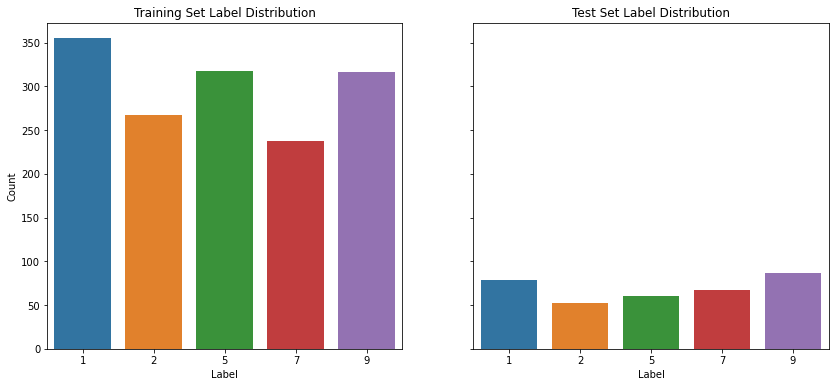

In [21]:
train_label_counts = train_df['Class'].value_counts()
test_label_counts = test_df['Class'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.barplot(x=train_label_counts.index, y=train_label_counts.values, ax=axes[0])
axes[0].set_title('Training Set Label Distribution')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Count')

sns.barplot(x=test_label_counts.index, y=test_label_counts.values, ax=axes[1])
axes[1].set_title('Test Set Label Distribution')
axes[1].set_xlabel('Label')

plt.show()

# Training

In [22]:
train_features = train_df[selected_features_columns].values.astype(np.float32)
test_features = test_df[selected_features_columns].values.astype(np.float32)

In [23]:
label_column = 'Class'
train_labels = train_df[label_column].values
test_labels = test_df[label_column].values

train_labels_multiple = train_labels.copy()
train_labels_multiple[train_labels == 1] = 0 
train_labels_multiple[train_labels_multiple == 2] = 1 
train_labels_multiple[train_labels_multiple == 5] = 2
train_labels_multiple[train_labels_multiple == 7] = 3 
train_labels_multiple[train_labels_multiple == 9] = 4

test_labels_multiple = test_labels.copy()
test_labels_multiple[test_labels == 1] = 0 
test_labels_multiple[test_labels_multiple == 2] = 1 
test_labels_multiple[test_labels_multiple == 5] = 2 
test_labels_multiple[test_labels_multiple == 7] = 3 
test_labels_multiple[test_labels_multiple == 9] = 4

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for scikit-learn Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize scikit-learn's RandomForestClassifier
rf_cpu = RandomForestClassifier()

# Set up GridSearchCV with scikit-learn RandomForestClassifier
grid_search = GridSearchCV(estimator=rf_cpu, param_grid=param_grid,
                           cv=5, verbose=2, scoring='accuracy')

# Fit the model on training data (runs on CPU)
grid_search.fit(train_features, train_labels_multiple)

# Best hyperparameters found
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   1.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   1.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   1.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   1.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   1.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   1.9s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   2.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_s

[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed: 13.1min finished


Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [25]:
from sklearn.ensemble import RandomForestClassifier

# Train the final scikit-learn Random Forest model with the best parameters
final_model_cpu = RandomForestClassifier(**best_params)

# Fit the model on the training data (runs on CPU)
final_model_cpu.fit(train_features, train_labels_multiple)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5)

# Evaluate

Test accuracy (GPU): 0.8957


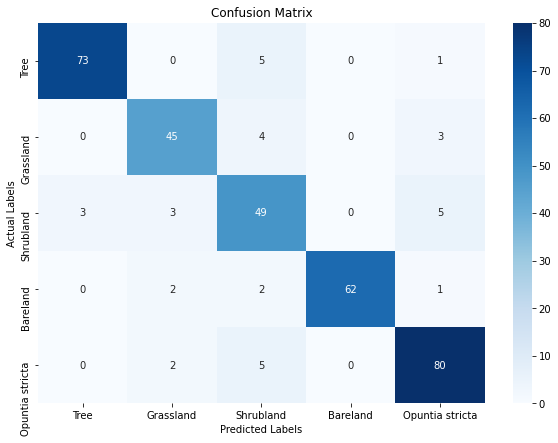

Classification Report:
                 precision    recall  f1-score   support

           Tree       0.96      0.92      0.94        79
      Grassland       0.87      0.87      0.87        52
      Shrubland       0.75      0.82      0.78        60
       Bareland       1.00      0.93      0.96        67
Opuntia stricta       0.89      0.92      0.90        87

       accuracy                           0.90       345
      macro avg       0.89      0.89      0.89       345
   weighted avg       0.90      0.90      0.90       345

Per-class Metrics:
Class 0 (Tree):
  Accuracy: 0.9739
  Sensitivity: 0.9241
  Specificity: 0.9887
  Precision: 0.9605
  Kappa: 0.9251
Class 1 (Grassland):
  Accuracy: 0.9594
  Sensitivity: 0.8654
  Specificity: 0.9761
  Precision: 0.8654
  Kappa: 0.8415
Class 2 (Shrubland):
  Accuracy: 0.9217
  Sensitivity: 0.8167
  Specificity: 0.9439
  Precision: 0.7538
  Kappa: 0.7363
Class 3 (Bareland):
  Accuracy: 0.9855
  Sensitivity: 0.9254
  Specificity: 1.0000
  Pr

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, 
                             cohen_kappa_score)

def compute_metrics(conf_matrix):

    metrics = []
    num_classes = conf_matrix.shape[0]

    for i in range(num_classes):
        TP = conf_matrix[i, i]  # True Positives
        FN = np.sum(conf_matrix[i, :]) - TP  # False Negatives
        FP = np.sum(conf_matrix[:, i]) - TP  # False Positives
        TN = np.sum(conf_matrix) - (TP + FN + FP)  # True Negatives

        accuracy = (TP + TN) / np.sum(conf_matrix)
        sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0 
        specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
        precision = TP / (TP + FP) if (TP + FP) != 0 else 0
        
        observed_agreement = TP + TN
        total_instances = np.sum(conf_matrix)
        expected_agreement = ((TP + FP) * (TP + FN) + (TN + FN) * (TN + FP)) / total_instances
        if (1 - expected_agreement / total_instances) != 0:
            kappa = (observed_agreement / total_instances - expected_agreement / total_instances) / (
                1 - expected_agreement / total_instances)
        else:
            kappa = 0

        metrics.append({
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "Precision": precision,
            "Kappa": kappa,
        })

    return metrics

test_predictions_gpu = final_model_cpu.predict(test_features)

test_accuracy_gpu = accuracy_score(test_labels_multiple, test_predictions_gpu)
print(f"Test accuracy (GPU): {test_accuracy_gpu:.4f}")

conf_matrix = confusion_matrix(test_labels_multiple, test_predictions_gpu)

class_names = ['Tree', 'Grassland', 'Shrubland', 'Bareland', 'Opuntia stricta']

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.savefig("M100_Training_ConfusionMatrix.jpg", dpi=600, bbox_inches='tight')
plt.show()

class_report = classification_report(test_labels_multiple, test_predictions_gpu, target_names=class_names)
print("Classification Report:")
print(class_report)

metrics_per_class = compute_metrics(conf_matrix)
print("Per-class Metrics:")
for idx, metric_dict in enumerate(metrics_per_class):
    print(f"Class {idx} ({class_names[idx]}):")
    for key, value in metric_dict.items():
        print(f"  {key}: {value:.4f}")

kappa = cohen_kappa_score(test_labels_multiple, test_predictions_gpu)
print(f"Cohen's Kappa: {kappa:.4f}")

# Independent Test

In [28]:
test_data_path = 'annotation_features_test_compostite_2023_Features.csv' 
test_data = pd.read_csv(test_data_path)
test_data = test_data.dropna()

In [29]:
cols = [
    "2023_01_Data_band_1","2023_01_Data_band_2","2023_01_Data_band_3","2023_01_Data_band_4","2023_01_Data_band_5","2023_01_Data_band_6","2023_01_Data_band_7","2023_01_Data_band_8","2023_01_Data_band_9","2023_01_Data_band_10",
    "2023_02_Data_band_1","2023_02_Data_band_2","2023_02_Data_band_3","2023_02_Data_band_4","2023_02_Data_band_5","2023_02_Data_band_6","2023_02_Data_band_7","2023_02_Data_band_8","2023_02_Data_band_9","2023_02_Data_band_10",
    "2023_03_Data_band_1","2023_03_Data_band_2","2023_03_Data_band_3","2023_03_Data_band_4","2023_03_Data_band_5","2023_03_Data_band_6","2023_03_Data_band_7","2023_03_Data_band_8","2023_03_Data_band_9","2023_03_Data_band_10",
    "2023_04_Data_band_1","2023_04_Data_band_2","2023_04_Data_band_3","2023_04_Data_band_4","2023_04_Data_band_5","2023_04_Data_band_6","2023_04_Data_band_7","2023_04_Data_band_8","2023_04_Data_band_9","2023_04_Data_band_10",
    "2023_05_Data_band_1","2023_05_Data_band_2","2023_05_Data_band_3","2023_05_Data_band_4","2023_05_Data_band_5","2023_05_Data_band_6","2023_05_Data_band_7","2023_05_Data_band_8","2023_05_Data_band_9","2023_05_Data_band_10",
    "2023_06_Data_band_1","2023_06_Data_band_2","2023_06_Data_band_3","2023_06_Data_band_4","2023_06_Data_band_5","2023_06_Data_band_6","2023_06_Data_band_7","2023_06_Data_band_8","2023_06_Data_band_9","2023_06_Data_band_10",
    "2023_07_Data_band_1","2023_07_Data_band_2","2023_07_Data_band_3","2023_07_Data_band_4","2023_07_Data_band_5","2023_07_Data_band_6","2023_07_Data_band_7","2023_07_Data_band_8","2023_07_Data_band_9","2023_07_Data_band_10",
    "2023_08_Data_band_1","2023_08_Data_band_2","2023_08_Data_band_3","2023_08_Data_band_4","2023_08_Data_band_5","2023_08_Data_band_6","2023_08_Data_band_7","2023_08_Data_band_8","2023_08_Data_band_9","2023_08_Data_band_10",
    "2023_09_Data_band_1","2023_09_Data_band_2","2023_09_Data_band_3","2023_09_Data_band_4","2023_09_Data_band_5","2023_09_Data_band_6","2023_09_Data_band_7","2023_09_Data_band_8","2023_09_Data_band_9","2023_09_Data_band_10",
    "2023_10_Data_band_1","2023_10_Data_band_2","2023_10_Data_band_3","2023_10_Data_band_4","2023_10_Data_band_5","2023_10_Data_band_6","2023_10_Data_band_7","2023_10_Data_band_8","2023_10_Data_band_9","2023_10_Data_band_10",
    "2023_11_Data_band_1","2023_11_Data_band_2","2023_11_Data_band_3","2023_11_Data_band_4","2023_11_Data_band_5","2023_11_Data_band_6","2023_11_Data_band_7","2023_11_Data_band_8","2023_11_Data_band_9","2023_11_Data_band_10",
    "2023_12_Data_band_1","2023_12_Data_band_2","2023_12_Data_band_3","2023_12_Data_band_4","2023_12_Data_band_5","2023_12_Data_band_6","2023_12_Data_band_7","2023_12_Data_band_8","2023_12_Data_band_9","2023_12_Data_band_10",
        ]

test_data[cols] = test_data[cols] / 10000

In [30]:
import pandas as pd
import numpy as np

months = [f"{i:02d}" for i in range(1, 13)]  

for month in months:

    prefix = f"2023_{month}_Data_band_"
    
    #     band_1 = Blue
    #     band_2 = Green
    #     band_3 = Red
    #     band_7 = NIR
    
    red_col = prefix + "3"    # Red
    nir_col = prefix + "7"    # NIR
    green_col = prefix + "2"  # Green
    
    red = test_data[red_col]
    nir = test_data[nir_col]
    green = test_data[green_col]
    
    # --------------- NDVI ---------------
    # NDVI = (NIR - Red) / (NIR + Red)
    test_data[f"2023_{month}_ndvi_band_1"] = (
        (nir - red) / (nir + red + 1e-6)  
    )
    
    # --------------- NDWI ---------------
    # (Green - NIR) / (Green + NIR) 
    test_data[f"2023_{month}_ndwi_band_1"] = (
        (green - nir) / (green + nir + 1e-6)
    )
    
    # --------------- GNDVI --------------
    # GNDVI = (NIR - Green) / (NIR + Green)
    test_data[f"2023_{month}_gndvi_band_1"] = (
        (nir - green) / (nir + green + 1e-6)
    )
    
    # --------------- MSAVI --------------
    # MSAVI = [2*NIR + 1 - sqrt((2*NIR+1)^2 - 8*(NIR - RED))] / 2
    test_data[f"2023_{month}_msavi_band_1"] = 0.5 * (
        (2 * nir + 1) - np.sqrt((2 * nir + 1)**2 - 8 * (nir - red))
    )


In [31]:
months = [
    "2023_01", "2023_02", "2023_03", "2023_04", "2023_05", "2023_06", 
    "2023_07", "2023_08", "2023_09", "2023_10", "2023_11", "2023_12"
]

# Calculate statistics for each band across all months
bands = [f"band_{i}" for i in range(1, 11)]

for band in bands:
    band_cols = [f"{month}_Data_{band}" for month in months]
    test_data[f"{band}_mean"] = test_data[band_cols].mean(axis=1)
    test_data[f"{band}_std"] = test_data[band_cols].std(axis=1)
    test_data[f"{band}_min"] = test_data[band_cols].min(axis=1)
    test_data[f"{band}_max"] = test_data[band_cols].max(axis=1)
    test_data[f"{band}_range"] = test_data[f"{band}_max"] - test_data[f"{band}_min"]

# Calculate annual statistics for additional metrics
metrics = ["ndvi", "ndwi", "gndvi", "msavi", "precipitation", "LST_Night", "LST_Day", "ET"]

for metric in metrics:
    annual_cols = [f"{month}_{metric}_band_1" for month in months]
    test_data[f"{metric}_mean"] = test_data[annual_cols].mean(axis=1)
    test_data[f"{metric}_std"] = test_data[annual_cols].std(axis=1)
    test_data[f"{metric}_min"] = test_data[annual_cols].min(axis=1)
    test_data[f"{metric}_max"] = test_data[annual_cols].max(axis=1)
    test_data[f"{metric}_range"] = test_data[f"{metric}_max"] - test_data[f"{metric}_min"]

In [32]:
test_data

,Class,X,Y,2023_01_Data_band_1,2023_01_Data_band_2,2023_01_Data_band_3,2023_01_Data_band_4,2023_01_Data_band_5,2023_01_Data_band_6,2023_01_Data_band_7,...,LST_Day_mean,LST_Day_std,LST_Day_min,LST_Day_max,LST_Day_range,ET_mean,ET_std,ET_min,ET_max,ET_range
0,9.0,37.131815,0.353982,0.0713,0.1096,0.1604,0.1912,0.2264,0.2561,0.2602,...,15288.100806,192.200452,14930.800000,15526.590909,595.790909,71.166667,37.547764,36.25,155.25,119.00
1,7.0,37.132178,0.353803,0.0878,0.1338,0.1918,0.2050,0.2298,0.2553,0.2568,...,15288.403096,192.164900,14930.400000,15526.818182,596.418182,71.298611,37.675439,36.25,155.75,119.50
2,7.0,37.132444,0.353081,0.0787,0.1278,0.1888,0.2029,0.2311,0.2493,0.2610,...,15289.987174,192.706750,14928.800000,15528.318182,599.518182,71.062500,37.815777,36.25,155.25,119.00
3,7.0,37.132716,0.352620,0.0888,0.1368,0.2046,0.2109,0.2486,0.2673,0.2872,...,15290.953224,192.952138,14928.200000,15529.181818,600.981818,71.062500,37.958895,36.50,155.00,118.50
4,1.0,37.132543,0.352719,0.0428,0.0708,0.0982,0.1835,0.2226,0.2478,0.2032,...,15290.827022,192.928990,14928.400000,15528.863636,600.463636,70.972222,37.862729,36.50,154.75,118.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,2.0,36.830165,0.586012,0.0982,0.1286,0.1782,0.2068,0.2220,0.2385,0.2500,...,15357.642021,261.693008,14956.000000,15703.538462,747.538462,85.909722,52.654732,36.25,200.50,164.25
215,2.0,36.828988,0.586466,0.0914,0.1252,0.1798,0.2023,0.2249,0.2479,0.2500,...,15357.669237,260.034539,14956.857143,15700.538462,743.681319,88.451389,54.395791,36.75,203.25,166.50
216,2.0,36.831153,0.584038,0.0958,0.1306,0.1834,0.2085,0.2300,0.2446,0.2540,...,15354.743720,265.120821,14944.714286,15700.923077,756.208791,84.708333,51.142459,36.25,196.50,160.25
217,7.0,36.829174,0.585206,0.1202,0.1760,0.2474,0.2555,0.2739,0.2931,0.3132,...,15354.959405,261.326830,14949.571429,15698.538462,748.967033,87.513889,54.176477,36.75,206.25,169.50


In [33]:
def compute_dtw_features_for_test(test_data, global_mean_sequences, time_series_groups):
    dtw_features = pd.DataFrame(index=test_data.index)
    for group_key, columns in time_series_groups.items():
        global_mean_seq = global_mean_sequences[group_key].astype(float)
        dtw_features[f"DTW_{group_key}_Distance"] = test_data[columns].apply(
            lambda row: dtw.distance_fast(row.values.astype(float), global_mean_seq), axis=1
        )
    return dtw_features

test_dtw_features = compute_dtw_features_for_test(test_data, global_mean_sequences, time_series_groups)

for col in test_dtw_features.columns:
    test_data[col] = test_dtw_features[col]

In [34]:
test_data

,Class,X,Y,2023_01_Data_band_1,2023_01_Data_band_2,2023_01_Data_band_3,2023_01_Data_band_4,2023_01_Data_band_5,2023_01_Data_band_6,2023_01_Data_band_7,...,DTW_band_9_Distance,DTW_band_10_Distance,DTW_ndvi_Distance,DTW_ndwi_Distance,DTW_gndvi_Distance,DTW_msavi_Distance,DTW_precipitation_Distance,DTW_LST_Night_Distance,DTW_LST_Day_Distance,DTW_ET_Distance
0,9.0,37.131815,0.353982,0.0713,0.1096,0.1604,0.1912,0.2264,0.2561,0.2602,...,0.150704,0.128291,0.394054,0.223521,0.223521,0.328575,11.487007,63.479668,163.218805,50.270224
1,7.0,37.132178,0.353803,0.0878,0.1338,0.1918,0.2050,0.2298,0.2553,0.2568,...,0.152868,0.145326,0.513990,0.399508,0.399508,0.284434,11.555759,63.463870,163.293815,50.027627
2,7.0,37.132444,0.353081,0.0787,0.1278,0.1888,0.2029,0.2311,0.2493,0.2610,...,0.154984,0.129348,0.432628,0.288916,0.288916,0.260445,11.639516,63.186939,165.479512,51.281899
3,7.0,37.132716,0.352620,0.0888,0.1368,0.2046,0.2109,0.2486,0.2673,0.2872,...,0.175524,0.158799,0.363324,0.202938,0.202938,0.206595,11.707705,62.981747,166.825956,51.693256
4,1.0,37.132543,0.352719,0.0428,0.0708,0.0982,0.1835,0.2226,0.2478,0.2032,...,0.172962,0.143257,0.315268,0.239798,0.239798,0.124257,11.673878,63.109005,166.817572,51.827363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,2.0,36.830165,0.586012,0.0982,0.1286,0.1782,0.2068,0.2220,0.2385,0.2500,...,0.254509,0.199372,0.519941,0.288032,0.288032,0.402857,11.256450,237.466616,354.817313,57.026750
215,2.0,36.828988,0.586466,0.0914,0.1252,0.1798,0.2023,0.2249,0.2479,0.2500,...,0.160381,0.152086,0.520191,0.282057,0.282057,0.452655,11.219326,234.667253,350.398110,62.671483
216,2.0,36.831153,0.584038,0.0958,0.1306,0.1834,0.2085,0.2300,0.2446,0.2540,...,0.202824,0.157959,0.537530,0.321682,0.321682,0.475753,11.263830,240.405919,346.995063,53.203475
217,7.0,36.829174,0.585206,0.1202,0.1760,0.2474,0.2555,0.2739,0.2931,0.3132,...,0.263902,0.318770,0.431163,0.336484,0.336484,0.238762,11.201248,232.826465,345.342337,62.716113


In [35]:
test_features = test_data[selected_features_columns].values
test_labels= test_data["Class"].values 

test_labels_multiple = test_labels.copy()
test_labels_multiple[test_labels == 1] = 0 
test_labels_multiple[test_labels == 2] = 1 
test_labels_multiple[test_labels == 5] = 2
test_labels_multiple[test_labels == 7] = 3 
test_labels_multiple[test_labels == 9] = 4

test_features = test_features.astype(float)

Test accuracy (GPU): 0.8433


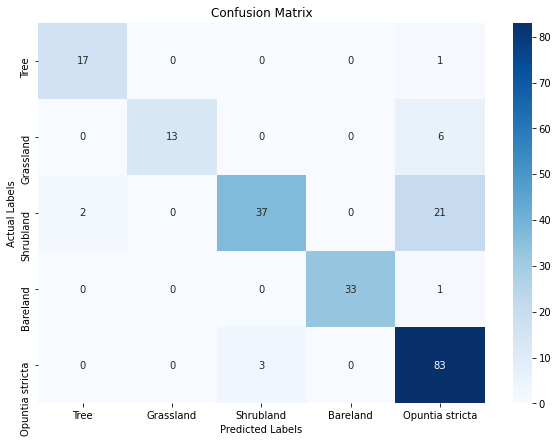

Classification Report:
                 precision    recall  f1-score   support

           Tree       0.89      0.94      0.92        18
      Grassland       1.00      0.68      0.81        19
      Shrubland       0.93      0.62      0.74        60
       Bareland       1.00      0.97      0.99        34
Opuntia stricta       0.74      0.97      0.84        86

       accuracy                           0.84       217
      macro avg       0.91      0.84      0.86       217
   weighted avg       0.87      0.84      0.84       217

Per-class Metrics:
Class 0 (Tree):
  Accuracy: 0.9862
  Sensitivity: 0.9444
  Specificity: 0.9899
  Precision: 0.8947
  Kappa: 0.9114
Class 1 (Grassland):
  Accuracy: 0.9724
  Sensitivity: 0.6842
  Specificity: 1.0000
  Precision: 1.0000
  Kappa: 0.7981
Class 2 (Shrubland):
  Accuracy: 0.8802
  Sensitivity: 0.6167
  Specificity: 0.9809
  Precision: 0.9250
  Kappa: 0.6662
Class 3 (Bareland):
  Accuracy: 0.9954
  Sensitivity: 0.9706
  Specificity: 1.0000
  Pr

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score

test_predictions_gpu = final_model_cpu.predict(test_features)
test_accuracy_gpu = accuracy_score(test_labels_multiple, test_predictions_gpu)
conf_matrix = confusion_matrix(test_labels_multiple, test_predictions_gpu)

class_names = ['Tree', 'Grassland', 'Shrubland', 'Bareland', 'Opuntia stricta']

print(f"Test accuracy (GPU): {test_accuracy_gpu:.4f}")

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.savefig("M100_Testing_ConfusionMatrix.jpg", dpi=600, bbox_inches='tight')
plt.show()

class_report = classification_report(test_labels_multiple, 
                                     test_predictions_gpu, 
                                     target_names=class_names)
print("Classification Report:")
print(class_report)

metrics = compute_metrics(conf_matrix)
print("Per-class Metrics:")
for idx, metric in enumerate(metrics):
    print(f"Class {idx} ({class_names[idx]}):")
    for key, value in metric.items():
        print(f"  {key}: {value:.4f}")

kappa = cohen_kappa_score(test_labels_multiple, test_predictions_gpu)
print(f"Cohen's Kappa: {kappa:.4f}")

# Prediction Map

In [37]:
import rasterio
from rasterio.windows import Window
import numpy as np

def predict_large_area_in_tiles(
    input_tif: str,
    output_prefix: str,
    model,
    feature_indices: list,
    n_tiles_x: int = 2,
    n_tiles_y: int = 3,
    nodata_value: float = -9999.0  
):

    with rasterio.open(input_tif) as src:

        meta = src.meta.copy()

        meta.update(count=1, dtype='float32', nodata=nodata_value)

        tile_width = src.width // n_tiles_x
        tile_height = src.height // n_tiles_y

        tile_index = 0
        for y in range(n_tiles_y):
            for x in range(n_tiles_x):
                tile_index += 1

                col_off = x * tile_width
                row_off = y * tile_height
                
                if x == n_tiles_x - 1:
                    w = src.width - col_off
                else:
                    w = tile_width

                if y == n_tiles_y - 1:
                    h = src.height - row_off
                else:
                    h = tile_height

                window = Window(
                    col_off=col_off,
                    row_off=row_off,
                    width=w,
                    height=h
                )


                block_data = src.read(window=window)

                block_data = block_data[feature_indices, :, :]
                bands_count, height, width = block_data.shape

                mask_invalid = np.any(~np.isfinite(block_data), axis=0)

                valid_px = ~mask_invalid

                if not np.any(valid_px):

                    predictions_full = np.full((height, width), nodata_value, dtype='float32')

                    out_meta = meta.copy()
                    out_meta.update({
                        'height': height,
                        'width': width,
                        'transform': rasterio.windows.transform(window, src.transform)
                    })

                    out_name = f"{output_prefix}_tile_{tile_index}.tif"
                    with rasterio.open(out_name, 'w', **out_meta) as dst:
                        dst.write(predictions_full, 1)
                    print(f"Tile {tile_index} all invalid. Saved nodata to {out_name}")
                    continue

                block_data_2d = block_data.reshape(bands_count, -1).T  # (height*width, bands_count)
                valid_data = block_data_2d[valid_px.flatten(), :]      

                predictions_valid = model.predict(valid_data) 

                predictions_full = np.full((height, width), nodata_value, dtype='float32')
                predictions_full[valid_px] = predictions_valid


                out_meta = meta.copy()
                out_meta.update({
                    'height': height,
                    'width': width,
                    'transform': rasterio.windows.transform(window, src.transform)
                })

                out_name = f"{output_prefix}_tile_{tile_index}.tif"
                with rasterio.open(out_name, 'w', **out_meta) as dst:
                    dst.write(predictions_full, 1)

                print(f"Tile {tile_index} prediction done. Saved to {out_name}")


if __name__ == "__main__":
    feature_indices = [  0  , 1 ,  2 ,  3 ,  8,   9,  10 , 11 , 12,  16 , 18 , 19 , 20 , 21 , 22 , 24 , 25  ,26,
  27,  28,  29,  38,  40,  41,  42,  43,  45,  46,  48,  50,  51,  52,  54,  55,  56,  57,
  58,  60,  61,  63,  68,  70,  71,  72,  74,  76,  77,  78,  80,  81,  82,  84,  86,  88,
  90,  91,  94,  96,  97,  98, 103, 106, 107, 109, 110, 111, 112, 113, 116, 118, 120, 121,
 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 138, 139, 140,
 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
 160, 161, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 196, 197,
 198, 200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 213, 215, 217, 218, 219, 220, 223,
 224, 225, 229, 230, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 246,
 248, 259, 262, 264, 265, 269, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 282, 283,
 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302,
 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 329, 332,
 333, 334]

    input_tif_path = "/home/ji.song/blue/InavsiveSpecies_Kenya_FeaturesTIF/composite.tif"
    output_file_prefix = "/home/ji.song/blue/InavsiveSpecies_Kenya_FeaturesTIF/2023_prediction_result"

    predict_large_area_in_tiles(
        input_tif=input_tif_path,
        output_prefix=output_file_prefix,
        model=final_model_cpu,
        feature_indices=feature_indices,
        n_tiles_x=6,
        n_tiles_y=5,
        nodata_value=-9999.0  
    )

Tile 1 prediction done. Saved to /home/ji.song/blue/InavsiveSpecies_Kenya_FeaturesTIF/2023_prediction_result_tile_1.tif
Tile 2 prediction done. Saved to /home/ji.song/blue/InavsiveSpecies_Kenya_FeaturesTIF/2023_prediction_result_tile_2.tif
Tile 3 prediction done. Saved to /home/ji.song/blue/InavsiveSpecies_Kenya_FeaturesTIF/2023_prediction_result_tile_3.tif
Tile 4 prediction done. Saved to /home/ji.song/blue/InavsiveSpecies_Kenya_FeaturesTIF/2023_prediction_result_tile_4.tif
Tile 5 all invalid. Saved nodata to /home/ji.song/blue/InavsiveSpecies_Kenya_FeaturesTIF/2023_prediction_result_tile_5.tif
Tile 6 all invalid. Saved nodata to /home/ji.song/blue/InavsiveSpecies_Kenya_FeaturesTIF/2023_prediction_result_tile_6.tif
Tile 7 prediction done. Saved to /home/ji.song/blue/InavsiveSpecies_Kenya_FeaturesTIF/2023_prediction_result_tile_7.tif
Tile 8 prediction done. Saved to /home/ji.song/blue/InavsiveSpecies_Kenya_FeaturesTIF/2023_prediction_result_tile_8.tif
Tile 9 prediction done. Saved to /

# SHAP

In [37]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [38]:
explainer_rf = shap.TreeExplainer(final_model_cpu)
shap_values_rf = explainer_rf.shap_values(train_features)

print(f"Type of shap_values_rf: {type(shap_values_rf)}")

# shap_values_rf[c].shape => (n_samples, n_features)

Type of shap_values_rf: <class 'list'>


In [45]:
import pickle

# shap_values_rf = explainer_rf.shap_values(train_features)

with open('shap_values_rf.pkl', 'wb') as f:
    pickle.dump(shap_values_rf, f)


In [39]:
feature_display_dict = {

    "2023_01_Data_band_1": "2023_01_Sentinel2 Band2",
    "2023_01_Data_band_2": "2023_01_Sentinel2_Band3",
    "2023_01_Data_band_3": "2023_01_Sentinel2_Band4",
    "2023_01_Data_band_4": "2023_01_Sentinel2_Band5",
    "2023_01_Data_band_5": "2023_01_Sentinel2_Band6",
    "2023_01_Data_band_6": "2023_01_Sentinel2_Band7",
    "2023_01_Data_band_7": "2023_01_Sentinel2_Band8",
    "2023_01_Data_band_8": "2023_01_Sentinel2_Band8a",
    "2023_01_Data_band_9": "2023_01_Sentinel2_Band11",
    "2023_01_Data_band_10": "2023_01_Sentinel2_Band12",

    "2023_02_Data_band_1": "2023_02_Sentinel2_Band2",
    "2023_02_Data_band_2": "2023_02_Sentinel2_Band3",
    "2023_02_Data_band_3": "2023_02_Sentinel2_Band4",
    "2023_02_Data_band_4": "2023_02_Sentinel2_Band5",
    "2023_02_Data_band_5": "2023_02_Sentinel2_Band6",
    "2023_02_Data_band_6": "2023_02_Sentinel2_Band7",
    "2023_02_Data_band_7": "2023_02_Sentinel2_Band8",
    "2023_02_Data_band_8": "2023_02_Sentinel2_Band8a",
    "2023_02_Data_band_9": "2023_02_Sentinel2_Band11",
    "2023_02_Data_band_10": "2023_02_Sentinel2_Band12",

    "2023_03_Data_band_1": "2023_03_Sentinel2_Band2",
    "2023_03_Data_band_2": "2023_03_Sentinel2_Band3",
    "2023_03_Data_band_3": "2023_03_Sentinel2_Band4",
    "2023_03_Data_band_4": "2023_03_Sentinel2_Band5",
    "2023_03_Data_band_5": "2023_03_Sentinel2_Band6",
    "2023_03_Data_band_6": "2023_03_Sentinel2_Band7",
    "2023_03_Data_band_7": "2023_03_Sentinel2_Band8",
    "2023_03_Data_band_8": "2023_03_Sentinel2_Band8a",
    "2023_03_Data_band_9": "2023_03_Sentinel2_Band11",
    "2023_03_Data_band_10": "2023_03_Sentinel2_Band12",

    "2023_04_Data_band_1": "2023_04_Sentinel2_Band2",
    "2023_04_Data_band_2": "2023_04_Sentinel2_Band3",
    "2023_04_Data_band_3": "2023_04_Sentinel2_Band4",
    "2023_04_Data_band_4": "2023_04_Sentinel2_Band5",
    "2023_04_Data_band_5": "2023_04_Sentinel2_Band6",
    "2023_04_Data_band_6": "2023_04_Sentinel2_Band7",
    "2023_04_Data_band_7": "2023_04_Sentinel2_Band8",
    "2023_04_Data_band_8": "2023_04_Sentinel2_Band8a",
    "2023_04_Data_band_9": "2023_04_Sentinel2_Band11",
    "2023_04_Data_band_10": "2023_04_Sentinel2_Band12",

    "2023_05_Data_band_1": "2023_05_Sentinel2_Band2",
    "2023_05_Data_band_2": "2023_05_Sentinel2_Band3",
    "2023_05_Data_band_3": "2023_05_Sentinel2_Band4",
    "2023_05_Data_band_4": "2023_05_Sentinel2_Band5",
    "2023_05_Data_band_5": "2023_05_Sentinel2_Band6",
    "2023_05_Data_band_6": "2023_05_Sentinel2_Band7",
    "2023_05_Data_band_7": "2023_05_Sentinel2_Band8",
    "2023_05_Data_band_8": "2023_05_Sentinel2_Band8a",
    "2023_05_Data_band_9": "2023_05_Sentinel2_Band11",
    "2023_05_Data_band_10": "2023_05_Sentinel2_Band12",

    "2023_06_Data_band_1": "2023_06_Sentinel2_Band2",
    "2023_06_Data_band_2": "2023_06_Sentinel2_Band3",
    "2023_06_Data_band_3": "2023_06_Sentinel2_Band4",
    "2023_06_Data_band_4": "2023_06_Sentinel2_Band5",
    "2023_06_Data_band_5": "2023_06_Sentinel2_Band6",
    "2023_06_Data_band_6": "2023_06_Sentinel2_Band7",
    "2023_06_Data_band_7": "2023_06_Sentinel2_Band8",
    "2023_06_Data_band_8": "2023_06_Sentinel2_Band8a",
    "2023_06_Data_band_9": "2023_06_Sentinel2_Band11",
    "2023_06_Data_band_10": "2023_06_Sentinel2_Band12",

    "2023_07_Data_band_1": "2023_07_Sentinel2_Band2",
    "2023_07_Data_band_2": "2023_07_Sentinel2_Band3",
    "2023_07_Data_band_3": "2023_07_Sentinel2_Band4",
    "2023_07_Data_band_4": "2023_07_Sentinel2_Band5",
    "2023_07_Data_band_5": "2023_07_Sentinel2_Band6",
    "2023_07_Data_band_6": "2023_07_Sentinel2_Band7",
    "2023_07_Data_band_7": "2023_07_Sentinel2_Band8",
    "2023_07_Data_band_8": "2023_07_Sentinel2_Band8a",
    "2023_07_Data_band_9": "2023_07_Sentinel2_Band11",
    "2023_07_Data_band_10": "2023_07_Sentinel2_Band12",

    "2023_08_Data_band_1": "2023_08_Sentinel2_Band2",
    "2023_08_Data_band_2": "2023_08_Sentinel2_Band3",
    "2023_08_Data_band_3": "2023_08_Sentinel2_Band4",
    "2023_08_Data_band_4": "2023_08_Sentinel2_Band5",
    "2023_08_Data_band_5": "2023_08_Sentinel2_Band6",
    "2023_08_Data_band_6": "2023_08_Sentinel2_Band7",
    "2023_08_Data_band_7": "2023_08_Sentinel2_Band8",
    "2023_08_Data_band_8": "2023_08_Sentinel2_Band8a",
    "2023_08_Data_band_9": "2023_08_Sentinel2_Band11",
    "2023_08_Data_band_10": "2023_08_Sentinel2_Band12",

    "2023_09_Data_band_1": "2023_09_Sentinel2_Band2",
    "2023_09_Data_band_2": "2023_09_Sentinel2_Band3",
    "2023_09_Data_band_3": "2023_09_Sentinel2_Band4",
    "2023_09_Data_band_4": "2023_09_Sentinel2_Band5",
    "2023_09_Data_band_5": "2023_09_Sentinel2_Band6",
    "2023_09_Data_band_6": "2023_09_Sentinel2_Band7",
    "2023_09_Data_band_7": "2023_09_Sentinel2_Band8",
    "2023_09_Data_band_8": "2023_09_Sentinel2_Band8a",
    "2023_09_Data_band_9": "2023_09_Sentinel2_Band11",
    "2023_09_Data_band_10": "2023_09_Sentinel2_Band12",

    "2023_10_Data_band_1": "2023_10_Sentinel2_Band2",
    "2023_10_Data_band_2": "2023_10_Sentinel2_Band3",
    "2023_10_Data_band_3": "2023_10_Sentinel2_Band4",
    "2023_10_Data_band_4": "2023_10_Sentinel2_Band5",
    "2023_10_Data_band_5": "2023_10_Sentinel2_Band6",
    "2023_10_Data_band_6": "2023_10_Sentinel2_Band7",
    "2023_10_Data_band_7": "2023_10_Sentinel2_Band8",
    "2023_10_Data_band_8": "2023_10_Sentinel2_Band8a",
    "2023_10_Data_band_9": "2023_10_Sentinel2_Band11",
    "2023_10_Data_band_10": "2023_10_Sentinel2_Band12",

    "2023_11_Data_band_1": "2023_11_Sentinel2_Band2",
    "2023_11_Data_band_2": "2023_11_Sentinel2_Band3",
    "2023_11_Data_band_3": "2023_11_Sentinel2_Band4",
    "2023_11_Data_band_4": "2023_11_Sentinel2_Band5",
    "2023_11_Data_band_5": "2023_11_Sentinel2_Band6",
    "2023_11_Data_band_6": "2023_11_Sentinel2_Band7",
    "2023_11_Data_band_7": "2023_11_Sentinel2_Band8",
    "2023_11_Data_band_8": "2023_11_Sentinel2_Band8a",
    "2023_11_Data_band_9": "2023_11_Sentinel2_Band11",
    "2023_11_Data_band_10": "2023_11_Sentinel2_Band12",

    "2023_12_Data_band_1": "2023_12_Sentinel2_Band2",
    "2023_12_Data_band_2": "2023_12_Sentinel2_Band3",
    "2023_12_Data_band_3": "2023_12_Sentinel2_Band4",
    "2023_12_Data_band_4": "2023_12_Sentinel2_Band5",
    "2023_12_Data_band_5": "2023_12_Sentinel2_Band6",
    "2023_12_Data_band_6": "2023_12_Sentinel2_Band7",
    "2023_12_Data_band_7": "2023_12_Sentinel2_Band8",
    "2023_12_Data_band_8": "2023_12_Sentinel2_Band8a",
    "2023_12_Data_band_9": "2023_12_Sentinel2_Band11",
    "2023_12_Data_band_10": "2023_12_Sentinel2_Band12",

    # ----------------
    "2023_01_ndvi_band_1": "2023_01_NDVI",
    "2023_02_ndvi_band_1": "2023_02_NDVI",
    "2023_03_ndvi_band_1": "2023_03_NDVI",
    "2023_04_ndvi_band_1": "2023_04_NDVI",
    "2023_05_ndvi_band_1": "2023_05_NDVI",
    "2023_06_ndvi_band_1": "2023_06_NDVI",
    "2023_07_ndvi_band_1": "2023_07_NDVI",
    "2023_08_ndvi_band_1": "2023_08_NDVI",
    "2023_09_ndvi_band_1": "2023_09_NDVI",
    "2023_10_ndvi_band_1": "2023_10_NDVI",
    "2023_11_ndvi_band_1": "2023_11_NDVI",
    "2023_12_ndvi_band_1": "2023_12_NDVI",

    "2023_01_ndwi_band_1": "2023_01_NDWI",
    "2023_02_ndwi_band_1": "2023_02_NDWI",
    "2023_03_ndwi_band_1": "2023_03_NDWI",
    "2023_04_ndwi_band_1": "2023_04_NDWI",
    "2023_05_ndwi_band_1": "2023_05_NDWI",
    "2023_06_ndwi_band_1": "2023_06_NDWI",
    "2023_07_ndwi_band_1": "2023_07_NDWI",
    "2023_08_ndwi_band_1": "2023_08_NDWI",
    "2023_09_ndwi_band_1": "2023_09_NDWI",
    "2023_10_ndwi_band_1": "2023_10_NDWI",
    "2023_11_ndwi_band_1": "2023_11_NDWI",
    "2023_12_ndwi_band_1": "2023_12_NDWI",

    "2023_01_gndvi_band_1": "2023_01_GNDVI",
    "2023_02_gndvi_band_1": "2023_02_GNDVI",
    "2023_03_gndvi_band_1": "2023_03_GNDVI",
    "2023_04_gndvi_band_1": "2023_04_GNDVI",
    "2023_05_gndvi_band_1": "2023_05_GNDVI",
    "2023_06_gndvi_band_1": "2023_06_GNDVI",
    "2023_07_gndvi_band_1": "2023_07_GNDVI",
    "2023_08_gndvi_band_1": "2023_08_GNDVI",
    "2023_09_gndvi_band_1": "2023_09_GNDVI",
    "2023_10_gndvi_band_1": "2023_10_GNDVI",
    "2023_11_gndvi_band_1": "2023_11_GNDVI",
    "2023_12_gndvi_band_1": "2023_12_GNDVI",

    "2023_01_msavi_band_1": "2023_01_MSAVI",
    "2023_02_msavi_band_1": "2023_02_MSAVI",
    "2023_03_msavi_band_1": "2023_03_MSAVI",
    "2023_04_msavi_band_1": "2023_04_MSAVI",
    "2023_05_msavi_band_1": "2023_05_MSAVI",
    "2023_06_msavi_band_1": "2023_06_MSAVI",
    "2023_07_msavi_band_1": "2023_07_MSAVI",
    "2023_08_msavi_band_1": "2023_08_MSAVI",
    "2023_09_msavi_band_1": "2023_09_MSAVI",
    "2023_10_msavi_band_1": "2023_10_MSAVI",
    "2023_11_msavi_band_1": "2023_11_MSAVI",
    "2023_12_msavi_band_1": "2023_12_MSAVI",

    "2023_01_precipitation_band_1": "2023_01_Precipitation",
    "2023_02_precipitation_band_1": "2023_02_Precipitation",
    "2023_03_precipitation_band_1": "2023_03_Precipitation",
    "2023_04_precipitation_band_1": "2023_04_Precipitation",
    "2023_05_precipitation_band_1": "2023_05_Precipitation",
    "2023_06_precipitation_band_1": "2023_06_Precipitation",
    "2023_07_precipitation_band_1": "2023_07_Precipitation",
    "2023_08_precipitation_band_1": "2023_08_Precipitation",
    "2023_09_precipitation_band_1": "2023_09_Precipitation",
    "2023_10_precipitation_band_1": "2023_10_Precipitation",
    "2023_11_precipitation_band_1": "2023_11_Precipitation",
    "2023_12_precipitation_band_1": "2023_12_Precipitation",

    "2023_01_LST_Night_band_1": "2023_01_LST_Night",
    "2023_02_LST_Night_band_1": "2023_02_LST_Night",
    "2023_03_LST_Night_band_1": "2023_03_LST_Night",
    "2023_04_LST_Night_band_1": "2023_04_LST_Night",
    "2023_05_LST_Night_band_1": "2023_05_LST_Night",
    "2023_06_LST_Night_band_1": "2023_06_LST_Night",
    "2023_07_LST_Night_band_1": "2023_07_LST_Night",
    "2023_08_LST_Night_band_1": "2023_08_LST_Night",
    "2023_09_LST_Night_band_1": "2023_09_LST_Night",
    "2023_10_LST_Night_band_1": "2023_10_LST_Night",
    "2023_11_LST_Night_band_1": "2023_11_LST_Night",
    "2023_12_LST_Night_band_1": "2023_12_LST_Night",

    "2023_01_LST_Day_band_1": "2023_01_LST_Day",
    "2023_02_LST_Day_band_1": "2023_02_LST_Day",
    "2023_03_LST_Day_band_1": "2023_03_LST_Day",
    "2023_04_LST_Day_band_1": "2023_04_LST_Day",
    "2023_05_LST_Day_band_1": "2023_05_LST_Day",
    "2023_06_LST_Day_band_1": "2023_06_LST_Day",
    "2023_07_LST_Day_band_1": "2023_07_LST_Day",
    "2023_08_LST_Day_band_1": "2023_08_LST_Day",
    "2023_09_LST_Day_band_1": "2023_09_LST_Day",
    "2023_10_LST_Day_band_1": "2023_10_LST_Day",
    "2023_11_LST_Day_band_1": "2023_11_LST_Day",
    "2023_12_LST_Day_band_1": "2023_12_LST_Day",

    "2023_01_ET_band_1": "2023_01_ET",
    "2023_02_ET_band_1": "2023_02_ET",
    "2023_03_ET_band_1": "2023_03_ET",
    "2023_04_ET_band_1": "2023_04_ET",
    "2023_05_ET_band_1": "2023_05_ET",
    "2023_06_ET_band_1": "2023_06_ET",
    "2023_07_ET_band_1": "2023_07_ET",
    "2023_08_ET_band_1": "2023_08_ET",
    "2023_09_ET_band_1": "2023_09_ET",
    "2023_10_ET_band_1": "2023_10_ET",
    "2023_11_ET_band_1": "2023_11_ET",
    "2023_12_ET_band_1": "2023_12_ET",


    "Slope_band_1_band_1": "Slope",
    "PublicPolygons_Distance_band_1_band_1": "Protected_Areas_Distance",
    "SRTM_ELEV_band_1_band_1": "Elevation",
    "WetLands_Distance_band_1_band_1": "WetLands_Distance",
    "WaterBodies_Distance_band_1_band_1": "WaterBodies_Distance",
    "TWI_band_1_band_1": "TWI",
    "TPI_band_1_band_1": "TPI",
    "Rivers_Distance_band_1_band_1": "Rivers_Distance",
    "Population_KD_band_1_band_1": "Population_Density",
    "Livestock_2015_KD_band_1_band_1": "Livestock_Density",
    "Building_KD_band_1_band_1": "Building_Density",
    "Aspect_band_1_band_1": "Aspect",
    "CanopyHeight_ROI_band_1": "Canopy_Height",

    # ----------------
    # 4)  "band_i_XXX" => "BandX_XXX"

    # ----------------
    "band_1_mean": "Band2_mean",
    "band_1_std":  "Band2_std",
    "band_1_min":  "Band2_min",
    "band_1_max":  "Band2_max",
    "band_1_range":"Band2_range",

    "band_2_mean": "Band3_mean",
    "band_2_std":  "Band3_std",
    "band_2_min":  "Band3_min",
    "band_2_max":  "Band3_max",
    "band_2_range":"Band3_range",

    "band_3_mean": "Band4_mean",
    "band_3_std":  "Band4_std",
    "band_3_min":  "Band4_min",
    "band_3_max":  "Band4_max",
    "band_3_range":"Band4_range",

    "band_4_mean": "Band5_mean",
    "band_4_std":  "Band5_std",
    "band_4_min":  "Band5_min",
    "band_4_max":  "Band5_max",
    "band_4_range":"Band5_range",

    "band_5_mean": "Band6_mean",
    "band_5_std":  "Band6_std",
    "band_5_min":  "Band6_min",
    "band_5_max":  "Band6_max",
    "band_5_range":"Band6_range",

    "band_6_mean": "Band7_mean",
    "band_6_std":  "Band7_std",
    "band_6_min":  "Band7_min",
    "band_6_max":  "Band7_max",
    "band_6_range":"Band7_range",

    "band_7_mean": "Band8_mean",
    "band_7_std":  "Band8_std",
    "band_7_min":  "Band8_min",
    "band_7_max":  "Band8_max",
    "band_7_range":"Band8_range",

    "band_8_mean": "Band8a_mean",
    "band_8_std":  "Band8a_std",
    "band_8_min":  "Band8a_min",
    "band_8_max":  "Band8a_max",
    "band_8_range":"Band8a_range",

    "band_9_mean": "Band11_mean",
    "band_9_std":  "Band11_std",
    "band_9_min":  "Band11_min",
    "band_9_max":  "Band11_max",
    "band_9_range":"Band11_range",

    "band_10_mean": "Band12_mean",
    "band_10_std":  "Band12_std",
    "band_10_min":  "Band12_min",
    "band_10_max":  "Band12_max",
    "band_10_range":"Band12_range",

    # ----------------

    # ----------------
    "ET_mean": "ET_mean",
    "ET_std": "ET_std",
    "ET_min": "ET_min",
    "ET_max": "ET_max",
    "ET_range": "ET_range",

    "LST_Day_mean": "LST_Day_mean",
    "LST_Day_std": "LST_Day_std",
    "LST_Day_min": "LST_Day_min",
    "LST_Day_max": "LST_Day_max",
    "LST_Day_range": "LST_Day_range",

    "LST_Night_mean": "LST_Night_mean",
    "LST_Night_std": "LST_Night_std",
    "LST_Night_min": "LST_Night_min",
    "LST_Night_max": "LST_Night_max",
    "LST_Night_range": "LST_Night_range",

    "precipitation_mean": "Precipitation_mean",
    "precipitation_std": "Precipitation_std",
    "precipitation_min": "Precipitation_min",
    "precipitation_max": "Precipitation_max",
    "precipitation_range": "Precipitation_range",

    "ndvi_mean": "NDVI_mean",
    "ndvi_std": "NDVI_std",
    "ndvi_min": "NDVI_min",
    "ndvi_max": "NDVI_max",
    "ndvi_range": "NDVI_range",

    "ndwi_mean": "NDWI_mean",
    "ndwi_std": "NDWI_std",
    "ndwi_min": "NDWI_min",
    "ndwi_max": "NDWI_max",
    "ndwi_range": "NDWI_range",

    "gndvi_mean": "GNDVI_mean",
    "gndvi_std": "GNDVI_std",
    "gndvi_min": "GNDVI_min",
    "gndvi_max": "GNDVI_max",
    "gndvi_range": "GNDVI_range",

    "msavi_mean": "MSAVI_mean",
    "msavi_std": "MSAVI_std",
    "msavi_min": "MSAVI_min",
    "msavi_max": "MSAVI_max",
    "msavi_range": "MSAVI_range",

    # ----------------
    # 6) DTW_band_i_Distance => BandX
    #    (band_1->Band2, ..., band_10->Band12)
    # ----------------
    "DTW_band_1_Distance": "DTW_Band2",
    "DTW_band_2_Distance": "DTW_Band3",
    "DTW_band_3_Distance": "DTW_Band4",
    "DTW_band_4_Distance": "DTW_Band5",
    "DTW_band_5_Distance": "DTW_Band6",
    "DTW_band_6_Distance": "DTW_Band7",
    "DTW_band_7_Distance": "DTW_Band8",
    "DTW_band_8_Distance": "DTW_Band8a",
    "DTW_band_9_Distance": "DTW_Band11",
    "DTW_band_10_Distance": "DTW_Band12",

    # ----------------
    # 7) DTW_xxx_Distance => DTW_xxx
    # ----------------
    "DTW_ndvi_Distance": "DTW_NDVI",
    "DTW_ndwi_Distance": "DTW_NDWI",
    "DTW_gndvi_Distance": "DTW_GNDVI",
    "DTW_msavi_Distance": "DTW_MSAVI",
    "DTW_precipitation_Distance": "DTW_Precipitation",
    "DTW_LST_Night_Distance": "DTW_LST_Night",
    "DTW_LST_Day_Distance": "DTW_LST_Day",
    "DTW_ET_Distance": "DTW_ET"
}

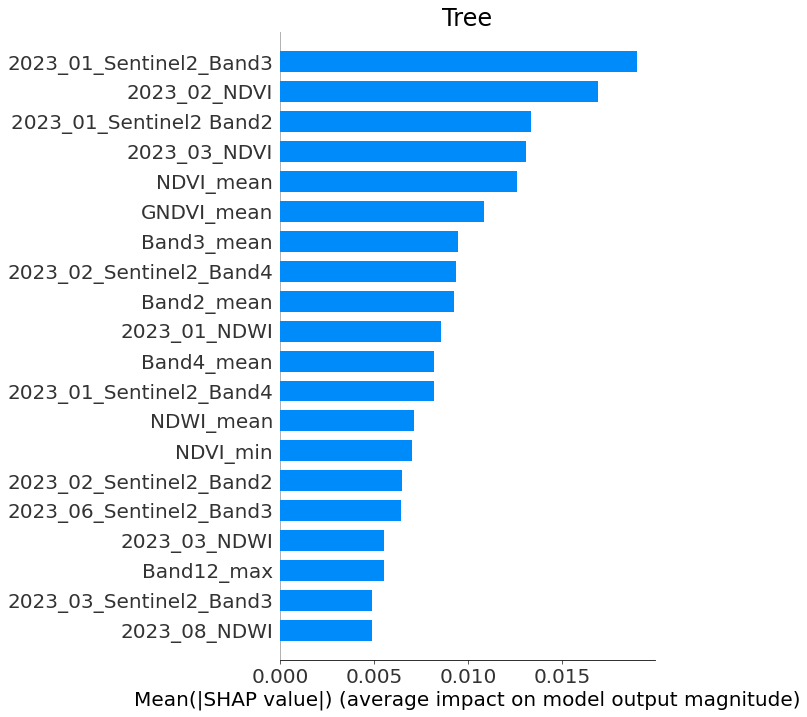

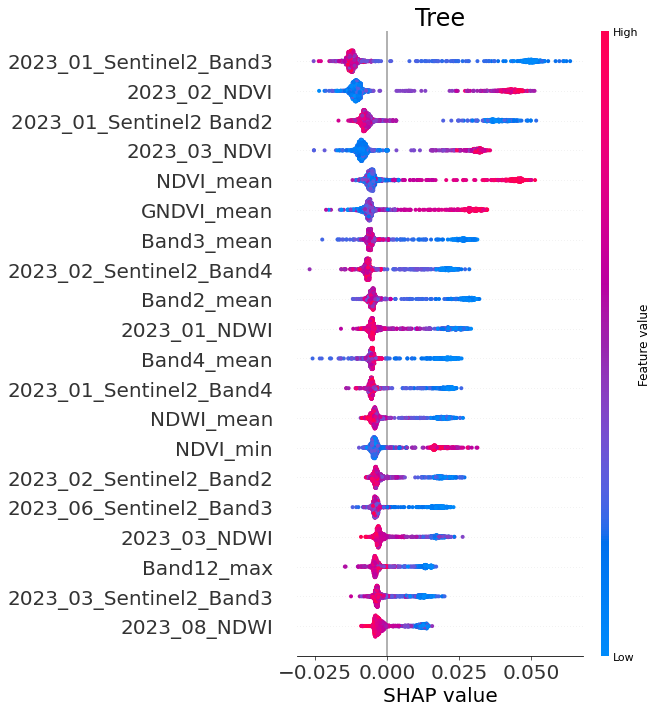

In [40]:
import shap
import matplotlib.pyplot as plt
import numpy as np

class_idx = 0
shap_values_class = shap_values_rf[class_idx]  # shape = (n_samples, n_features)

mapped_feature_names = [
    feature_display_dict.get(col, col) for col in selected_features_columns
]

shap.summary_plot(
    shap_values_class,
    train_features, 
    feature_names=mapped_feature_names,
    plot_type='bar',
    show=False  
)
plt.title("Tree", fontsize=24)  
plt.xlabel("Mean(|SHAP value|) (average impact on model output magnitude)", fontsize=20)  
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=20)

plt.savefig("shap_bar_plot_trees.png", dpi=1200, bbox_inches='tight')
plt.show()

shap.summary_plot(
    shap_values_class,
    train_features,
    feature_names=mapped_feature_names,
    show=False
)
plt.title("Tree", fontsize=24)
plt.xlabel("SHAP value", fontsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.savefig("shap_beeswarm_plot_tree.png", dpi=1200, bbox_inches='tight')
plt.show()


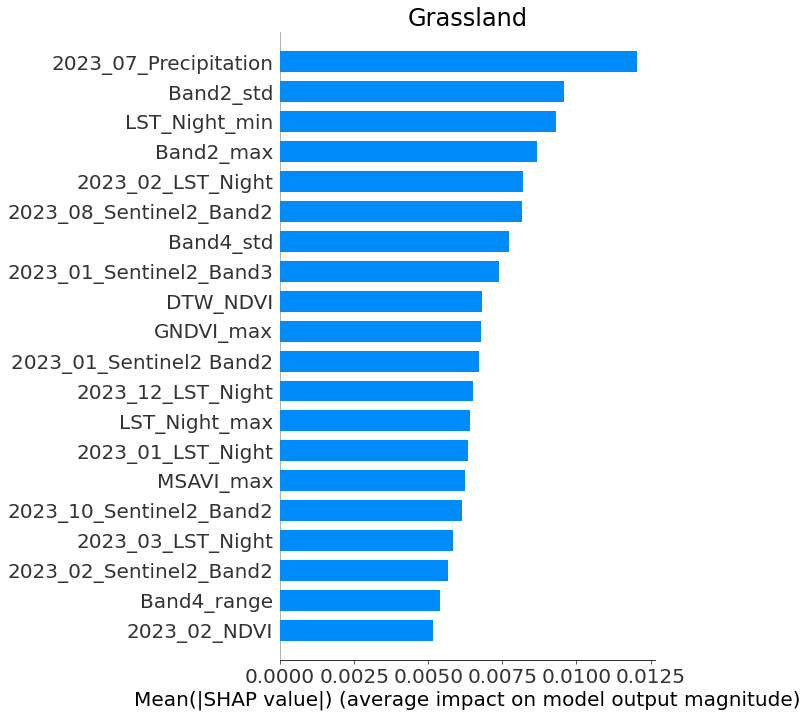

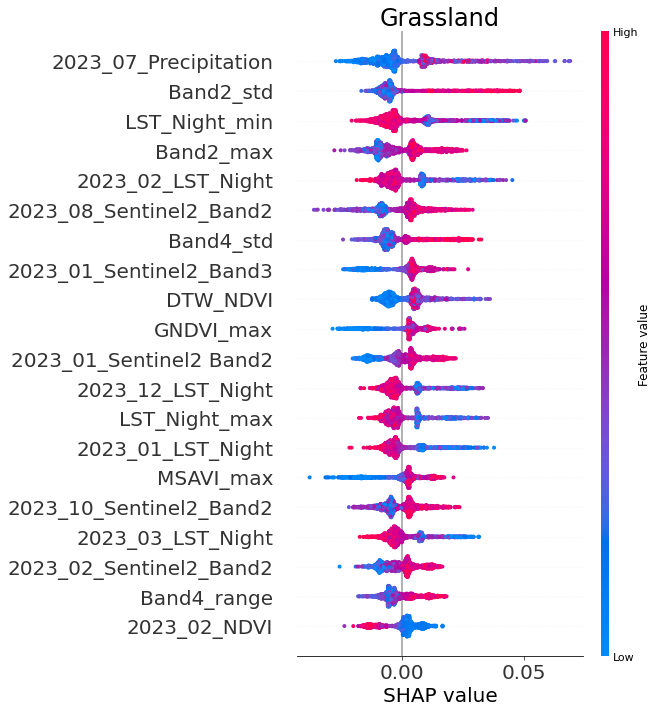

In [41]:
import shap
import matplotlib.pyplot as plt
import numpy as np

class_idx = 1
shap_values_class = shap_values_rf[class_idx]  # shape = (n_samples, n_features)

mapped_feature_names = [
    feature_display_dict.get(col, col) for col in selected_features_columns
]

shap.summary_plot(
    shap_values_class,
    train_features, 
    feature_names=mapped_feature_names,
    plot_type='bar',
    show=False  
)
plt.title("Grassland", fontsize=24)  
plt.xlabel("Mean(|SHAP value|) (average impact on model output magnitude)", fontsize=20)  
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.savefig("shap_bar_plot_grassland.png", dpi=1200, bbox_inches='tight')
plt.show()

shap.summary_plot(
    shap_values_class,
    train_features,
    feature_names=mapped_feature_names,
    show=False
)
plt.title("Grassland", fontsize=24)
plt.xlabel("SHAP value", fontsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.savefig("shap_beeswarm_plot_grassland.png", dpi=1200, bbox_inches='tight')
plt.show()


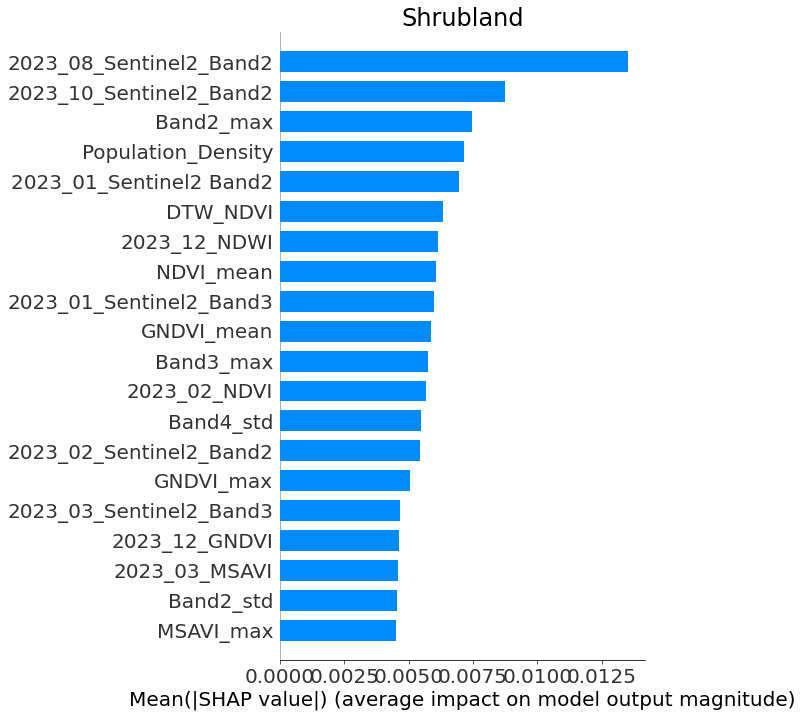

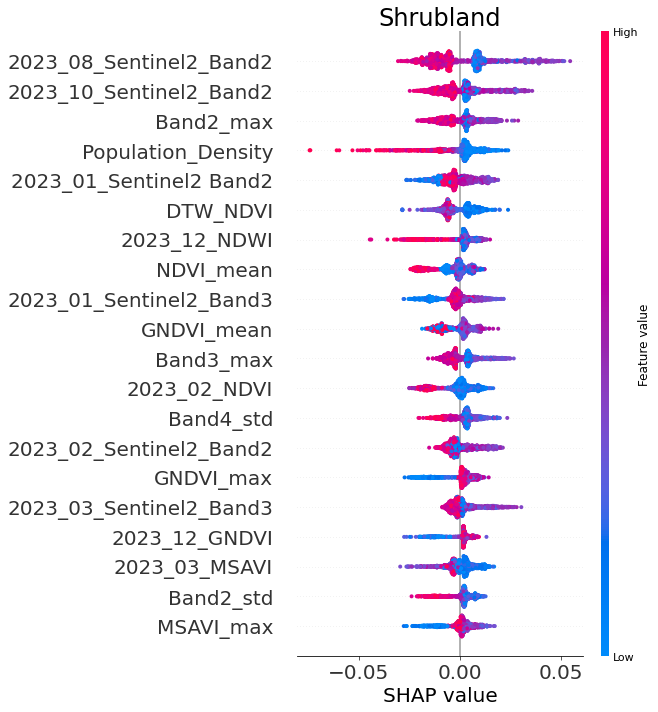

In [42]:
import shap
import matplotlib.pyplot as plt
import numpy as np

class_idx = 2
shap_values_class = shap_values_rf[class_idx]  # shape = (n_samples, n_features)

mapped_feature_names = [
    feature_display_dict.get(col, col) for col in selected_features_columns
]

shap.summary_plot(
    shap_values_class,
    train_features, 
    feature_names=mapped_feature_names,
    plot_type='bar',
    show=False  
)
plt.title("Shrubland", fontsize=24)  
plt.xlabel("Mean(|SHAP value|) (average impact on model output magnitude)", fontsize=20)  
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.savefig("shap_bar_plot_Shrubland.png", dpi=1200, bbox_inches='tight')
plt.show()

shap.summary_plot(
    shap_values_class,
    train_features,
    feature_names=mapped_feature_names,
    show=False
)
plt.title("Shrubland", fontsize=24)
plt.xlabel("SHAP value", fontsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.savefig("shap_beeswarm_plot_Shrubland.png", dpi=1200, bbox_inches='tight')
plt.show()


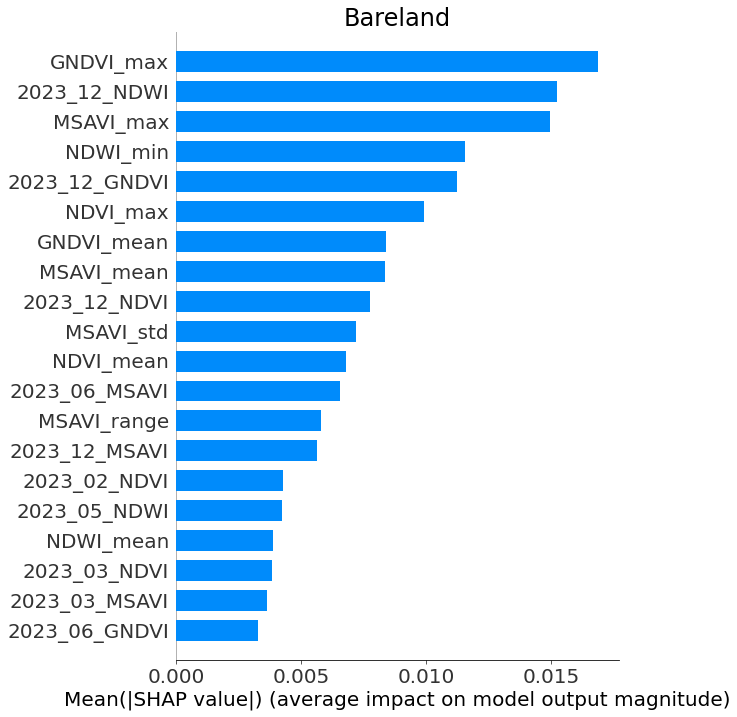

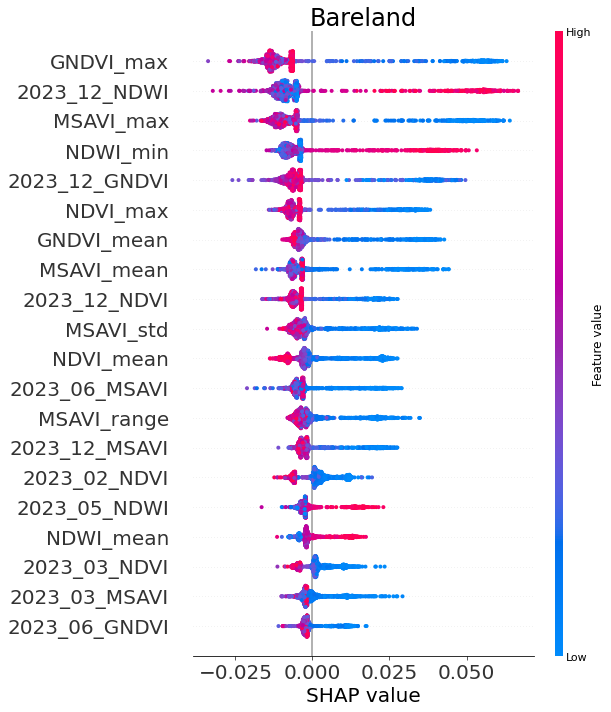

In [43]:
import shap
import matplotlib.pyplot as plt
import numpy as np

class_idx = 3
shap_values_class = shap_values_rf[class_idx]  # shape = (n_samples, n_features)

mapped_feature_names = [
    feature_display_dict.get(col, col) for col in selected_features_columns
]

shap.summary_plot(
    shap_values_class,
    train_features, 
    feature_names=mapped_feature_names,
    plot_type='bar',
    show=False  
)
plt.title("Bareland", fontsize=24)  
plt.xlabel("Mean(|SHAP value|) (average impact on model output magnitude)", fontsize=20)  
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.savefig("shap_bar_plot_Bareland.png", dpi=1200, bbox_inches='tight')
plt.show()

shap.summary_plot(
    shap_values_class,
    train_features,
    feature_names=mapped_feature_names,
    show=False
)
plt.title("Bareland", fontsize=24)
plt.xlabel("SHAP value", fontsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.savefig("shap_beeswarm_plot_Bareland.png", dpi=1200, bbox_inches='tight')
plt.show()


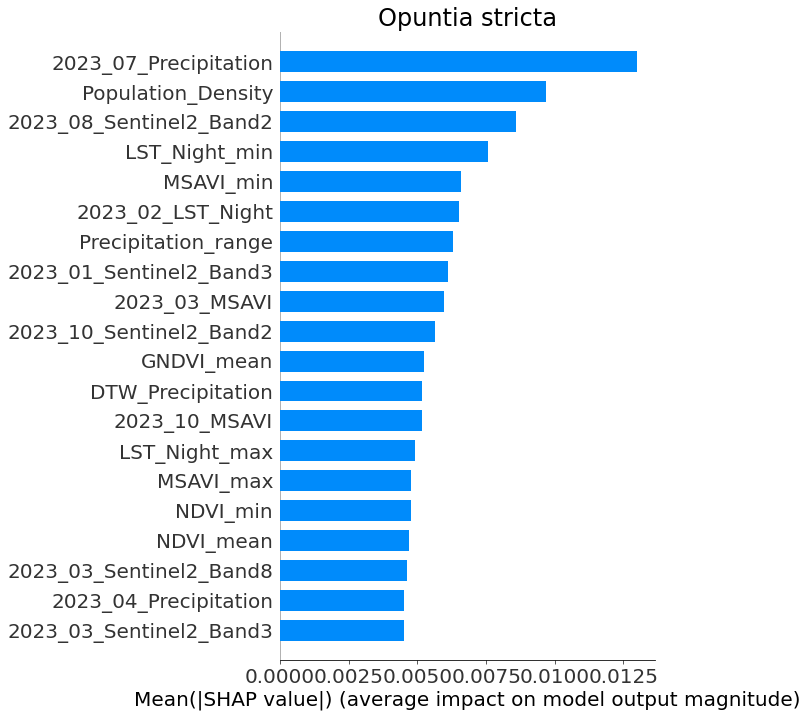

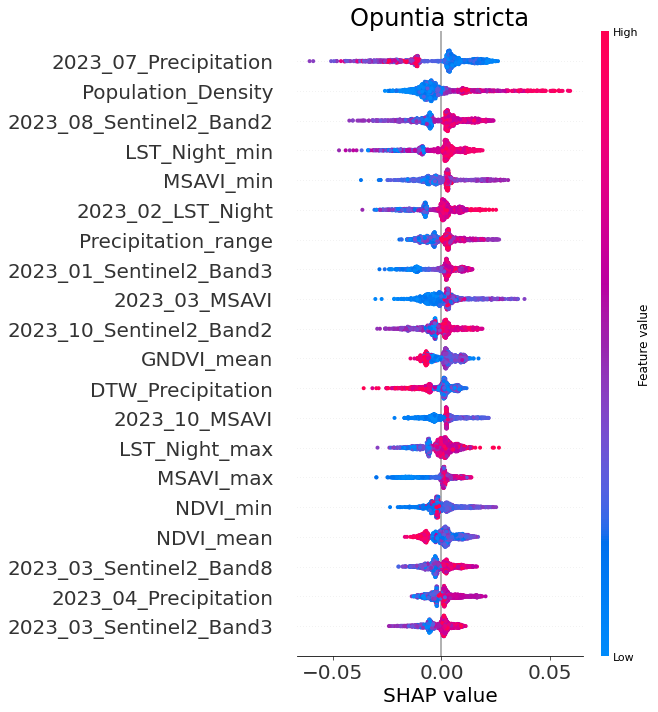

In [44]:
import shap
import matplotlib.pyplot as plt
import numpy as np

class_idx = 4
shap_values_class = shap_values_rf[class_idx]  # shape = (n_samples, n_features)

mapped_feature_names = [
    feature_display_dict.get(col, col) for col in selected_features_columns
]

shap.summary_plot(
    shap_values_class,
    train_features, 
    feature_names=mapped_feature_names,
    plot_type='bar',
    show=False  
)
plt.title("Opuntia stricta", fontsize=24)  
plt.xlabel("Mean(|SHAP value|) (average impact on model output magnitude)", fontsize=20)  
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.savefig("shap_bar_plot_Opuntia.png", dpi=1200, bbox_inches='tight')
plt.show()

shap.summary_plot(
    shap_values_class,
    train_features,
    feature_names=mapped_feature_names,
    show=False
)
plt.title("Opuntia stricta", fontsize=24)
plt.xlabel("SHAP value", fontsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.savefig("shap_beeswarm_plot_Opuntia.png", dpi=1200, bbox_inches='tight')
plt.show()
